In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
from numba import njit
from scipy import odr
from scipy.special import voigt_profile
from scipy.optimize import curve_fit
from scipy import stats as st
import time

os.chdir('F:/LANL/')
# os.chdir('/mnt/c/Users/gabeo/Desktop/analysis_temp/')
root = os.getcwd()

processedfolder = '/processed_data/'
# vconstantsavename = root+processedfolder+'1_vparams_Pr'  ## MAKE SURE TARGET IS CORRECT !

search_arr = sorted(os.listdir(root + processedfolder))
print('Searhing in array (sorted): ', search_arr)

Searhing in array (sorted):  ['0_vparams_La.h5', '1_vparams_Pr.h5', 'La_sample', '_temp_xs.npy', 'runs07862-08069', 'runs09919-10159', 'runs11121-11138', 'runs11139-11412', 'runs11413-11726', 'runs11727-12033', 'runs12034-12363', 'runs12364-12684', 'runs12686-13279', 'runs13280-13563', 'runs13564-13604', 'runs13605-13735', 'runs13736-13851', 'runs13852-14191', 'runs14192-14499', 'runs14500-15106', 'runs15114-15568', 'runs15569-16110', 'runs16135-16392', 'runs16453-16763', 'runs88888-99999', 'xs_cut.npy', 'xs_uncut.npy']


#### Make runs list for all targets

In [2]:
################################################# target La

folders_start = 'runs'+'11121-11138'
folders_end = 'runs'+'12364-12684'
start_i = search_arr.index(folders_start)
end_i = search_arr.index(folders_end)
print(f'Indices in above array, starti-endi: {start_i}-{end_i}, length {len(search_arr[start_i:end_i+1])}')


folderslistLa = []
if folders_start == folders_end:
    currfolder = search_arr[start_i]+'/'
    folderslistLa.append(currfolder)
else:
    for f in range(start_i, end_i+1):
#         print(f)
#         print(search_arr[f])
        currfolder = root+processedfolder+search_arr[f]
        currfolder = search_arr[f]+'/'
        # print(currfolder)
        folderslistLa.append(currfolder)

numfoldersLa = len(folderslistLa)
print(numfoldersLa, 'folders, array of folders is: ', folderslistLa)

## change below to multiple folders?
runslistLa_D = []  ## array of runfolders, runs
runslistLa_U = []
for i in range(len(folderslistLa)):
    runslistLa_D.append(sorted(os.listdir(root+processedfolder+folderslistLa[i]+'/pulseadd_D')))
    runslistLa_U.append(sorted(os.listdir(root+processedfolder+folderslistLa[i]+'/pulseadd_U')))

# print(len(runslistLa_D[0]))
# print(len(runslistLa_D[1]))

## now flatten list so that all runs are in one array ## not sure I will use this
flatrunslistLa_D = [run for folder in runslistLa_D for run in folder]
flatrunslistLa_D = np.asarray(flatrunslistLa_D)
flatrunslistLa_U = [run for folder in runslistLa_U for run in folder]
flatrunslistLa_U = np.asarray(flatrunslistLa_U)
# print(len(flatrunslistLa_D))

numrunsLa_tot_D = len(flatrunslistLa_D) ## U and D should be the same? ## should change to num pulses maybe
numrunsLa_tot_U = len(flatrunslistLa_U) ## 
print(f'Downstream total #runs: {numrunsLa_tot_D},   upstream total: {numrunsLa_tot_U}')


Indices in above array, starti-endi: 6-11, length 6
6 folders, array of folders is:  ['runs11121-11138/', 'runs11139-11412/', 'runs11413-11726/', 'runs11727-12033/', 'runs12034-12363/', 'runs12364-12684/']
Downstream total #runs: 1556,   upstream total: 1556


In [3]:
################################################# target Pr

folders_start = 'runs'+'12686-13279'
folders_end = 'runs'+'13564-13604'
start_i = search_arr.index(folders_start)
end_i = search_arr.index(folders_end)
print(f'Indices in above array, starti-endi: {start_i}-{end_i}, length {len(search_arr[start_i:end_i+1])}')


folderslistPr = []
if folders_start == folders_end:
    currfolder = search_arr[start_i]+'/'
    folderslistPr.append(currfolder)
else:
    for f in range(start_i, end_i+1):
#         print(f)
#         print(search_arr[f])
        currfolder = root+processedfolder+search_arr[f]
        currfolder = search_arr[f]+'/'
        print(currfolder)
        folderslistPr.append(currfolder)

numfoldersPr = len(folderslistPr)
print(numfoldersPr, 'folders, array of folders is: ', folderslistPr)

## change below to multiple folders?
runslistPr_D = []  ## array of runfolders, runs
runslistPr_U = []
for i in range(len(folderslistPr)):
    runslistPr_D.append(sorted(os.listdir(root+processedfolder+folderslistPr[i]+'/pulseadd_D')))
    runslistPr_U.append(sorted(os.listdir(root+processedfolder+folderslistPr[i]+'/pulseadd_U')))

# print(len(runslistPr_D[0]))
# print(len(runslistPr_D[1]))

## now flatten list so that all runs are in one array ## not sure I will use this
flatrunslistPr_D = [run for folder in runslistPr_D for run in folder]
flatrunslistPr_D = np.asarray(flatrunslistPr_D)
flatrunslistPr_U = [run for folder in runslistPr_U for run in folder]
flatrunslistPr_U = np.asarray(flatrunslistPr_U)
# print(len(flatrunslistPr_D))

numrunsPr_tot_D = len(flatrunslistPr_D) ## U and D should be the same? ## should change to num pulses maybe
numrunsPr_tot_U = len(flatrunslistPr_U) ## 
print(f'Downstream total #runs: {numrunsPr_tot_D},   upstream total: {numrunsPr_tot_U}')


Indices in above array, starti-endi: 12-14, length 3
runs12686-13279/
runs13280-13563/
runs13564-13604/
3 folders, array of folders is:  ['runs12686-13279/', 'runs13280-13563/', 'runs13564-13604/']
Downstream total #runs: 448,   upstream total: 448


In [4]:
################################################# target Tb

folders_start = 'runs'+'13852-14191'
folders_end = 'runs'+'14500-15106'
start_i = search_arr.index(folders_start)
end_i = search_arr.index(folders_end)
print(f'Indices in above array, starti-endi: {start_i}-{end_i}, length {len(search_arr[start_i:end_i+1])}')


folderslistTb = []
if folders_start == folders_end:
    currfolder = search_arr[start_i]+'/'
    folderslistTb.append(currfolder)
else:
    for f in range(start_i, end_i+1):
#         print(f)
#         print(search_arr[f])
        currfolder = root+processedfolder+search_arr[f]
        currfolder = search_arr[f]+'/'
        print(currfolder)
        folderslistTb.append(currfolder)

numfoldersTb = len(folderslistTb)
print(numfoldersTb, 'folders, array of folders is: ', folderslistTb)

## change below to multiple folders?
runslistTb_D = []  ## array of runfolders, runs
runslistTb_U = []
for i in range(len(folderslistTb)):
    runslistTb_D.append(sorted(os.listdir(root+processedfolder+folderslistTb[i]+'/pulseadd_D')))
    runslistTb_U.append(sorted(os.listdir(root+processedfolder+folderslistTb[i]+'/pulseadd_U')))

# print(len(runslistTb_D[0]))
# print(len(runslistTb_D[1]))

## now flatten list so that all runs are in one array ## not sure I will use this
flatrunslistTb_D = [run for folder in runslistTb_D for run in folder]
flatrunslistTb_D = np.asarray(flatrunslistTb_D)
flatrunslistTb_U = [run for folder in runslistTb_U for run in folder]
flatrunslistTb_U = np.asarray(flatrunslistTb_U)
# print(len(flatrunslistTb_D))

numrunsTb_tot_D = len(flatrunslistTb_D) ## U and D should be the same? ## should change to num pulses maybe
numrunsTb_tot_U = len(flatrunslistTb_U) ## 
print(f'Downstream total #runs: {numrunsTb_tot_D},   upstream total: {numrunsTb_tot_U}')


Indices in above array, starti-endi: 17-19, length 3
runs13852-14191/
runs14192-14499/
runs14500-15106/
3 folders, array of folders is:  ['runs13852-14191/', 'runs14192-14499/', 'runs14500-15106/']
Downstream total #runs: 1240,   upstream total: 1240


In [5]:
################################################# target Ho

folders_start = 'runs'+'15114-15568'
folders_end = 'runs'+'15114-15568'
start_i = search_arr.index(folders_start)
end_i = search_arr.index(folders_end)
print(f'Indices in above array, starti-endi: {start_i}-{end_i}, length {len(search_arr[start_i:end_i+1])}')


folderslistHo = []
if folders_start == folders_end:
    currfolder = search_arr[start_i]+'/'
    folderslistHo.append(currfolder)
else:
    for f in range(start_i, end_i+1):
#         print(f)
#         print(search_arr[f])
        currfolder = root+processedfolder+search_arr[f]
        currfolder = search_arr[f]+'/'
        print(currfolder)
        folderslistHo.append(currfolder)

numfoldersHo = len(folderslistHo)
print(numfoldersHo, 'folders, array of folders is: ', folderslistHo)

## change below to multiple folders?
runslistHo_D = []  ## array of runfolders, runs
runslistHo_U = []
for i in range(len(folderslistHo)):
    runslistHo_D.append(sorted(os.listdir(root+processedfolder+folderslistHo[i]+'/pulseadd_D')))
    runslistHo_U.append(sorted(os.listdir(root+processedfolder+folderslistHo[i]+'/pulseadd_U')))

# print(len(runslistHo_D[0]))
# print(len(runslistHo_D[1]))

## now flatten list so that all runs are in one array ## not sure I will use this
flatrunslistHo_D = [run for folder in runslistHo_D for run in folder]
flatrunslistHo_D = np.asarray(flatrunslistHo_D)
flatrunslistHo_U = [run for folder in runslistHo_U for run in folder]
flatrunslistHo_U = np.asarray(flatrunslistHo_U)
# print(len(flatrunslistHo_D))

numrunsHo_tot_D = len(flatrunslistHo_D) ## U and D should be the same? ## should change to num pulses maybe
numrunsHo_tot_U = len(flatrunslistHo_U) ## 
print(f'Downstream total #runs: {numrunsHo_tot_D},   upstream total: {numrunsHo_tot_U}')


Indices in above array, starti-endi: 20-20, length 1
1 folders, array of folders is:  ['runs15114-15568/']
Downstream total #runs: 455,   upstream total: 455


In [6]:
################################################# target Tm

folders_start = 'runs'+'15569-16110'
folders_end = 'runs'+'15569-16110'
start_i = search_arr.index(folders_start)
end_i = search_arr.index(folders_end)
print(f'Indices in above array, starti-endi: {start_i}-{end_i}, length {len(search_arr[start_i:end_i+1])}')


folderslistTm = []
if folders_start == folders_end:
    currfolder = search_arr[start_i]+'/'
    folderslistTm.append(currfolder)
else:
    for f in range(start_i, end_i+1):
#         print(f)
#         print(search_arr[f])
        currfolder = root+processedfolder+search_arr[f]
        currfolder = search_arr[f]+'/'
        print(currfolder)
        folderslistTm.append(currfolder)

numfoldersTm = len(folderslistTm)
print(numfoldersTm, 'folders, array of folders is: ', folderslistTm)

## change below to multiple folders?
runslistTm_D = []  ## array of runfolders, runs
runslistTm_U = []
for i in range(len(folderslistTm)):
    runslistTm_D.append(sorted(os.listdir(root+processedfolder+folderslistTm[i]+'/pulseadd_D')))
    runslistTm_U.append(sorted(os.listdir(root+processedfolder+folderslistTm[i]+'/pulseadd_U')))

# print(len(runslistTm_D[0]))
# print(len(runslistTm_D[1]))

## now flatten list so that all runs are in one array ## not sure I will use this
flatrunslistTm_D = [run for folder in runslistTm_D for run in folder]
flatrunslistTm_D = np.asarray(flatrunslistTm_D)
flatrunslistTm_U = [run for folder in runslistTm_U for run in folder]
flatrunslistTm_U = np.asarray(flatrunslistTm_U)
# print(len(flatrunslistTm_D))

numrunsTm_tot_D = len(flatrunslistTm_D) ## U and D should be the same? ## should change to num pulses maybe
numrunsTm_tot_U = len(flatrunslistTm_U) ## 
print(f'Downstream total #runs: {numrunsTm_tot_D},   upstream total: {numrunsTm_tot_U}')


Indices in above array, starti-endi: 21-21, length 1
1 folders, array of folders is:  ['runs15569-16110/']
Downstream total #runs: 532,   upstream total: 532


In [7]:
################################################# target Yb

folders_start = 'runs'+'16135-16392'
folders_end = 'runs'+'16135-16392'
start_i = search_arr.index(folders_start)
end_i = search_arr.index(folders_end)
print(f'Indices in above array, starti-endi: {start_i}-{end_i}, length {len(search_arr[start_i:end_i+1])}')


folderslistYb = []
if folders_start == folders_end:
    currfolder = search_arr[start_i]+'/'
    folderslistYb.append(currfolder)
else:
    for f in range(start_i, end_i+1):
#         print(f)
#         print(search_arr[f])
        currfolder = root+processedfolder+search_arr[f]
        currfolder = search_arr[f]+'/'
        print(currfolder)
        folderslistYb.append(currfolder)

numfoldersYb = len(folderslistYb)
print(numfoldersYb, 'folders, array of folders is: ', folderslistYb)

## change below to multiple folders?
runslistYb_D = []  ## array of runfolders, runs
runslistYb_U = []
for i in range(len(folderslistYb)):
    runslistYb_D.append(sorted(os.listdir(root+processedfolder+folderslistYb[i]+'/pulseadd_D')))
    runslistYb_U.append(sorted(os.listdir(root+processedfolder+folderslistYb[i]+'/pulseadd_U')))

# print(len(runslistYb_D[0]))
# print(len(runslistYb_D[1]))

## now flatten list so that all runs are in one array ## not sure I will use this
flatrunslistYb_D = [run for folder in runslistYb_D for run in folder]
flatrunslistYb_D = np.asarray(flatrunslistYb_D)
flatrunslistYb_U = [run for folder in runslistYb_U for run in folder]
flatrunslistYb_U = np.asarray(flatrunslistYb_U)
# print(len(flatrunslistYb_D))

numrunsYb_tot_D = len(flatrunslistYb_D) ## U and D should be the same? ## should change to num pulses maybe
numrunsYb_tot_U = len(flatrunslistYb_U) ## 
print(f'Downstream total #runs: {numrunsYb_tot_D},   upstream total: {numrunsYb_tot_U}')


Indices in above array, starti-endi: 22-22, length 1
1 folders, array of folders is:  ['runs16135-16392/']
Downstream total #runs: 247,   upstream total: 247


# Need to get num pulses!!! ending runs dont have as many pulses !!

In [8]:
## load in the x array. Also helps in determining sizes
## hope all the channels are the same between targets! lol

channels_all = []
folderpath = root+processedfolder+folderslistLa[0]
with h5py.File(folderpath+'/pulseadd_D/'+runslistLa_D[0][0], 'r') as f: ## new arr_sizer
    channels_D = list(f.keys())
    channels_all.append(channels_D[:-2])
    numchannels = len(channels_D)-1
    dataset = f[channels_D[-1]]   ## this is the xs dataset
    xs = np.array(dataset)*1e-6 ## now in ms
    numpoints = len(xs)
    f.close()
    
with h5py.File(folderpath+'/pulseadd_U/'+runslistLa_U[0][0], 'r') as f: ## new arr_sizer
    channels_U = list(f.keys())
    channels_all=np.append(channels_all, channels_U[:-1])
#     channels_all.append(channels[:-1])
    numchannels = len(channels_U)-1
    dataset = f[channels_U[-1]]   ## this is the xs dataset
    xs = np.array(dataset)*1e-6 ## now in ms
    numpoints = len(xs)
    f.close()
# print(channels_all)
# channels_all = np.asarray(channels_all, dtype=object)
# print(channels_all)
# channels_all = channels_all.flatten()
# print(numruns_tot_D,numchannels,numpoints)

print(channels_U)
print(channels_D)
print(f'length of x array: {len(xs)}')
# print(channels_D)
# print(channels_U)

print(f'all channels: {channels_all}')


['ch_12', 'ch_13', 'ch_14', 'ch_15', 'ch_16', 'ch_17', 'ch_18', 'ch_19', 'ch_20', 'ch_21', 'ch_22', 'ch_23', 'ch_24', 'xs ']
['ch_00', 'ch_01', 'ch_02', 'ch_03', 'ch_04', 'ch_05', 'ch_06', 'ch_07', 'ch_08', 'ch_09', 'ch_10', 'ch_11', 'ch_24', 'xs ']
length of x array: 8992
all channels: ['ch_00' 'ch_01' 'ch_02' 'ch_03' 'ch_04' 'ch_05' 'ch_06' 'ch_07' 'ch_08'
 'ch_09' 'ch_10' 'ch_11' 'ch_12' 'ch_13' 'ch_14' 'ch_15' 'ch_16' 'ch_17'
 'ch_18' 'ch_19' 'ch_20' 'ch_21' 'ch_22' 'ch_23' 'ch_24']


In [9]:
print(runslistLa_D[0][5:10])

['11126_pulseadd_D.h5', '11127_pulseadd_D.h5', '11128_pulseadd_D.h5', '11129_pulseadd_D.h5', '11130_pulseadd_D.h5']


#### actually load in FP12 pulseadd data per target

In [10]:
def loadrun_pulseadd(run, processedpath): ## not sure if this is the fastest way, or passing a list of runs...
    runname = processedpath+run
    with h5py.File(runname, 'r') as f:
        channels = list(f.keys())
        numchannels = len(channels)-1
        arrsizer = f[channels[-1]] ## gets the xs array
        arrsizer = np.asarray(arrsizer)
        numpoints = len(arrsizer)
        rundat = np.zeros((numchannels,numpoints),dtype = np.float64)
#             print(str(np.char.zfill(str(chan_enab[i]),2)))
#             dataset = f['ch '+str(np.char.zfill(str(chan_enab[i]), 2))]
        for i in range(0,numchannels):
            dataset = f[channels[i]+'/added_pulses/'+channels[i]][:]  ##change this to match channels[i]
            chdata = np.array(dataset)
            rundat[i] = rundat[i]+chdata
        f.close()
    return rundat

In [11]:
start=time.time()
# allLa_D = [] ## in this case cannot be np array because it is not same size arrays ## will be run, channel, numpoints
allLa_D = []
allLa_U = []

for f in range(0,len(folderslistLa)):
    fpath = root+processedfolder+folderslistLa[f]
    for r in range(0, len(runslistLa_D[f])):
        allLa_D.append(loadrun_pulseadd(runslistLa_D[f][r], fpath+'/pulseadd_D/'))
        allLa_U.append(loadrun_pulseadd(runslistLa_U[f][r], fpath+'/pulseadd_U/'))
    print(fpath+' done')

allLa_D = np.asarray(allLa_D)
allLa_U = np.asarray(allLa_U)
## don't do below yet, rest of program assumes run, ch
# allLa_D = allLa_D.transpose(1, 0, 2) ## change from [run, ch, numsamples] to [ch, run, numsamples] !!!!
# allLa_U = allLa_U.transpose(1, 0, 2)
    
end=time.time()
print('loaded La files time: ', end-start, '\n')

F:\LANL/processed_data/runs11121-11138/ done
F:\LANL/processed_data/runs11139-11412/ done
F:\LANL/processed_data/runs11413-11726/ done
F:\LANL/processed_data/runs11727-12033/ done
F:\LANL/processed_data/runs12034-12363/ done
F:\LANL/processed_data/runs12364-12684/ done
loaded La files time:  139.16705012321472 



In [12]:
start=time.time()
# allPr_D = [] ## in this case cannot be np array because it is not same size arrays ## will be run, channel, numpoints
allPr_D = []
allPr_U = []

for f in range(0,len(folderslistPr)):
    fpath = root+processedfolder+folderslistPr[f]
    for r in range(0, len(runslistPr_D[f])):
        allPr_D.append(loadrun_pulseadd(runslistPr_D[f][r], fpath+'/pulseadd_D/'))
        allPr_U.append(loadrun_pulseadd(runslistPr_U[f][r], fpath+'/pulseadd_U/'))
    print(fpath+' done')

allPr_D = np.asarray(allPr_D)
allPr_U = np.asarray(allPr_U)
## don't do below yet, rest of program assumes run, ch
# allPr_D = allPr_D.transpose(1, 0, 2) ## change from [run, ch, numsamples] to [ch, run, numsamples] !!!!
# allPr_U = allPr_U.transpose(1, 0, 2)
    
end=time.time()
print('loaded Pr files time: ', end-start, '\n')

F:\LANL/processed_data/runs12686-13279/ done
F:\LANL/processed_data/runs13280-13563/ done
F:\LANL/processed_data/runs13564-13604/ done
loaded Pr files time:  3.1767101287841797 



In [13]:
start=time.time()
# allTb_D = [] ## in this case cannot be np array because it is not same size arrays ## will be run, channel, numpoints
allTb_D = []
allTb_U = []

for f in range(0,len(folderslistTb)):
    fpath = root+processedfolder+folderslistTb[f]
    for r in range(0, len(runslistTb_D[f])):
        allTb_D.append(loadrun_pulseadd(runslistTb_D[f][r], fpath+'/pulseadd_D/'))
        allTb_U.append(loadrun_pulseadd(runslistTb_U[f][r], fpath+'/pulseadd_U/'))
    print(fpath+' done')

allTb_D = np.asarray(allTb_D)
allTb_U = np.asarray(allTb_U)
## don't do below yet, rest of program assumes run, ch
# allTb_D = allTb_D.transpose(1, 0, 2) ## change from [run, ch, numsamples] to [ch, run, numsamples] !!!!
# allTb_U = allTb_U.transpose(1, 0, 2)
    
end=time.time()
print('loaded Tb files time: ', end-start, '\n')

F:\LANL/processed_data/runs13852-14191/ done
F:\LANL/processed_data/runs14192-14499/ done
F:\LANL/processed_data/runs14500-15106/ done
loaded Tb files time:  117.5870749950409 



In [14]:
start=time.time()
# allTm_D = [] ## in this case cannot be np array because it is not same size arrays ## will be run, channel, numpoints
allTm_D = []
allTm_U = []

for f in range(0,len(folderslistTm)):
    fpath = root+processedfolder+folderslistTm[f]
    for r in range(0, len(runslistTm_D[f])):
        allTm_D.append(loadrun_pulseadd(runslistTm_D[f][r], fpath+'/pulseadd_D/'))
        allTm_U.append(loadrun_pulseadd(runslistTm_U[f][r], fpath+'/pulseadd_U/'))
    print(fpath+' done')

allTm_D = np.asarray(allTm_D)
allTm_U = np.asarray(allTm_U)
## don't do below yet, rest of program assumes run, ch
# allTm_D = allTm_D.transpose(1, 0, 2) ## change from [run, ch, numsamples] to [ch, run, numsamples] !!!!
# allTm_U = allTm_U.transpose(1, 0, 2)
    
end=time.time()
print('loaded Tm files time: ', end-start, '\n')

F:\LANL/processed_data/runs15569-16110/ done
loaded Tm files time:  47.772587060928345 



In [15]:
start=time.time()
# allHo_D = [] ## in this case cannot be np array because it is not same size arrays ## will be run, channel, numpoints
allHo_D = []
allHo_U = []

for f in range(0,len(folderslistHo)):
    fpath = root+processedfolder+folderslistHo[f]
    for r in range(0, len(runslistHo_D[f])):
        allHo_D.append(loadrun_pulseadd(runslistHo_D[f][r], fpath+'/pulseadd_D/'))
        allHo_U.append(loadrun_pulseadd(runslistHo_U[f][r], fpath+'/pulseadd_U/'))
    print(fpath+' done')

allHo_D = np.asarray(allHo_D)
allHo_U = np.asarray(allHo_U)
## don't do below yet, rest of program assumes run, ch
# allHo_D = allHo_D.transpose(1, 0, 2) ## change from [run, ch, numsamples] to [ch, run, numsamples] !!!!
# allHo_U = allHo_U.transpose(1, 0, 2)
    
end=time.time()
print('loaded Ho files time: ', end-start, '\n')

F:\LANL/processed_data/runs15114-15568/ done
loaded Ho files time:  40.65443396568298 



In [16]:
start=time.time()
# allYb_D = [] ## in this case cannot be np array because it is not same size arrays ## will be run, channel, numpoints
allYb_D = []
allYb_U = []

for f in range(0,len(folderslistYb)):
    fpath = root+processedfolder+folderslistYb[f]
    for r in range(0, len(runslistYb_D[f])):
        allYb_D.append(loadrun_pulseadd(runslistYb_D[f][r], fpath+'/pulseadd_D/'))
        allYb_U.append(loadrun_pulseadd(runslistYb_U[f][r], fpath+'/pulseadd_U/'))
    print(fpath+' done')

allYb_D = np.asarray(allYb_D)
allYb_U = np.asarray(allYb_U)
## don't do below yet, rest of program assumes run, ch
# allYb_D = allYb_D.transpose(1, 0, 2) ## change from [run, ch, numsamples] to [ch, run, numsamples] !!!!
# allYb_U = allYb_U.transpose(1, 0, 2)
    
end=time.time()
print('loaded Yb files time: ', end-start, '\n')

F:\LANL/processed_data/runs16135-16392/ done
loaded Yb files time:  21.8593692779541 



In [17]:
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in list(
                          locals().items())), key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                       allLa_D:  1.4 GiB
                       allLa_U:  1.4 GiB
                       allTb_D:  1.1 GiB
                       allTb_U:  1.1 GiB
                       allTm_D: 474.5 MiB
                       allTm_U: 474.5 MiB
                       allHo_D: 405.8 MiB
                       allHo_U: 405.8 MiB
                       allPr_D: 399.5 MiB
                       allPr_U: 399.5 MiB


In [18]:
## Testing switching arrays

# %matplotlib inline
# plt.plot(xs, allLa_U[0][1])
# plt.plot(xs, allLa_U[150][1])
# plt.plot(xs, allLa_U[200][1])
# plt.plot(xs, allLa_U[350][1])
# # plt.plot(xs, allLa_U[500][1])
# plt.plot(xs, allLa_U[-1][1])
# print(allLa_U.shape)

# test_reshape = allLa_U.transpose(1, 0, 2) ## switches first array to channels and second array to pulses
# print(test_reshape.shape)

In [19]:
print(allLa_D.shape)
print(allLa_D[1][1])
# print(allLa_D)
print(len(allLa_D))
print(len(allLa_D)//5)
print(np.linspace(len(allLa_D)//5, len(allLa_D), 5, dtype=int))

(1556, 13, 8992)
[ 208.68997925  137.41173916  139.50692603 ... 8060.99768324 8388.32121094
 8179.55103709]
1556
311
[ 311  622  933 1244 1556]


In [20]:
## makes a total spectra out of all runs

def spectra_maker(allarray_DU):  ## make sure array is Downstream _D then Upstream _U!!!
    addtimes=0
    if len(allarray_DU[0])!=len(allarray_DU[1]):
        emessage = 'Error: different num of down and up runs'
        raise Exception(emessage)
    allDarr = allarray_DU[0]
    allUarr = allarray_DU[1]
    # print(allDarr.shape)
    spectra_D = np.zeros((numchannels,numpoints), dtype = np.float64) 
    spectra_U = np.zeros((numchannels,numpoints), dtype = np.float64)
    print(f'number of runs: {len(allDarr)}')
    printruns = np.linspace(len(allDarr)//5, len(allDarr), 5, dtype=int)
    for r in range(0, len(allDarr)): ## for every run
        # print(r)
        start = time.time()
        if r ==printruns[0]  or r==printruns[1] or r==printruns[2] or r==printruns[3] or r==printruns[4]:
            print(rf'to run {r} took another {addtimes}')
            addtimes=0
        for ch in range(0, numchannels): ## and every channel
    #         if channels_D[ch] == 'ch_24':
    #             emessage = ('bg_ fit does not work for 6Li yet')
    #             print(emessage)
    #             logger.error('run '+run_num + emessage)
    #             raise Exception(emessage)
            # print(r, ch)
    #         print(channels[ch])
    #         print(len(bgsub_D[r][ch]))
    #         print(len(all_D[r][ch]))
            spectra_D[ch] = spectra_D[ch]+allDarr[r][ch]
            spectra_U[ch] = spectra_U[ch]+allUarr[r][ch]
        end = time.time()
        addtimes = addtimes+(end-start)
    return spectra_D, spectra_U

#### add up pulses, spectra for each target

12
La
number of runs: 1556
to run 311 took another 0.06897091865539551
to run 622 took another 0.06778144836425781
to run 933 took another 0.0703740119934082
to run 1244 took another 0.07105207443237305
(13, 8992)
(25, 8992) 

Pr
number of runs: 448
to run 89 took another 0.019412517547607422
to run 178 took another 0.01792740821838379
to run 268 took another 0.020915985107421875
to run 358 took another 0.019757509231567383
(25, 8992) 

Tb
number of runs: 1240
to run 248 took another 0.047235727310180664
to run 496 took another 0.049841880798339844
to run 744 took another 0.05284857749938965
to run 992 took another 0.047751665115356445
(25, 8992) 

Tm
number of runs: 532
to run 106 took another 0.019448280334472656
to run 212 took another 0.018016815185546875
to run 319 took another 0.019002199172973633
to run 425 took another 0.0186307430267334
(25, 8992) 

Ho
number of runs: 455
to run 91 took another 0.019568681716918945
to run 182 took another 0.020507335662841797
to run 273 took a

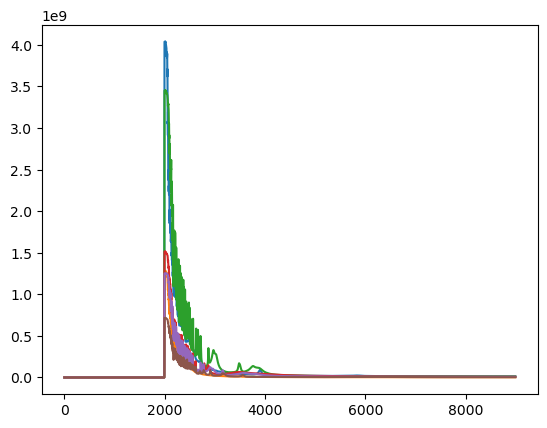

In [21]:
## add up all pulses to look at a nice spectra
start = time.time()

if numchannels != 13:
    emessage = 'numchannels does not have 6Li'
    raise Exception(emessage)
num_fittingchs = numchannels-1  ## removes the Li detector, assumes it is there
print(num_fittingchs)

print('La')
spectraLa_D, spectraLa_U = spectra_maker([allLa_D, allLa_U])
spectraLa = np.vstack((spectraLa_D[:-1], spectraLa_U))
print(spectraLa_D.shape)
print(spectraLa.shape, '\n')
plt.plot(spectraLa_D[1])
# plt.plot(spectraLa[1], ls ='--')
# plt.plot(spectraLa_U[1])
# plt.plot(spectraLa[14], ls ='--')

print('Pr')
spectraPr_D, spectraPr_U = spectra_maker([allPr_D, allPr_U])
spectraPr = np.vstack((spectraPr_D[:-1], spectraPr_U))
print(spectraPr.shape, '\n')
plt.plot(spectraPr[1])

print('Tb')
spectraTb_D, spectraTb_U = spectra_maker([allTb_D, allTb_U])
spectraTb = np.vstack((spectraTb_D[:-1], spectraTb_U))
print(spectraTb.shape, '\n')
plt.plot(spectraTb[1])

print('Tm')
spectraTm_D, spectraTm_U = spectra_maker([allTm_D, allTm_U])
spectraTm = np.vstack((spectraTm_D[:-1], spectraTm_U))
print(spectraTm.shape, '\n')
plt.plot(spectraTm[1])

print('Ho')
spectraHo_D, spectraHo_U = spectra_maker([allHo_D, allHo_U])
spectraHo = np.vstack((spectraHo_D[:-1], spectraHo_U))
print(spectraHo.shape, '\n')
plt.plot(spectraHo[1])

print('Yb')
spectraYb_D, spectraYb_U = spectra_maker([allYb_D, allYb_U])
spectraYb = np.vstack((spectraYb_D[:-1], spectraYb_U))
print(spectraYb.shape, '\n')
plt.plot(spectraYb[1])

#### tof to eV and vice versa

In [22]:
m_n = 1.6749286*10**(-27)
# L = 0
J_to_eV = 6.24151*10**18
eV_to_J = 1.602176565*10**-19

def tof_to_eV(xtof, FPlength, t_off):
    m_n = 1.6749286*10**(-27)
    delay = t_off
    x_eV_out = 0.5*m_n*((FPlength/((xtof+delay)/1000)))**2*J_to_eV  ## tof in ms
    return x_eV_out
def eV_to_tof(xeV, FPlength, t_off):
    m_n = 1.6749286*10**(-27)
    delay = t_off
    x_tof_out = delay + 1000*FPlength*np.sqrt(m_n/(2*xeV*eV_to_J))  ## tof in ms
    return x_tof_out


(array([1996, 1997, 1998, ..., 8989, 8990, 8991], shape=(6996,)),)
[0.000000e+00 5.120000e-04 1.024000e-03 ... 3.580416e+00 3.580928e+00
 3.581440e+00]
(25, 6992)
[-6.48716705e+03 -3.27986535e+03  6.19352933e+07  5.71080556e+08
  1.17631469e+09  1.28107727e+09  1.28175931e+09  1.28200924e+09
  1.28211353e+09  1.28222823e+09  1.28233477e+09  1.28238487e+09
  1.28245301e+09  1.28260164e+09  1.28261167e+09  1.28259409e+09
  1.28281866e+09  1.28290251e+09  1.28291558e+09  1.28273795e+09]


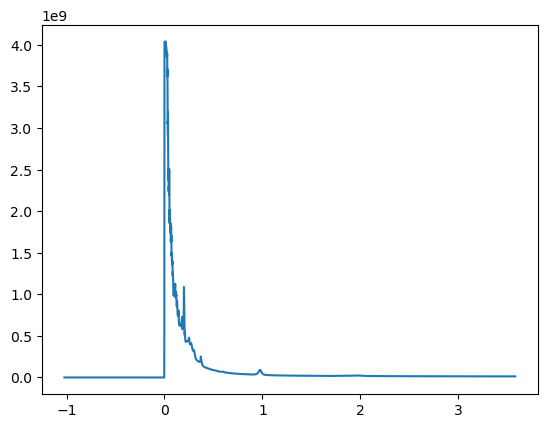

In [23]:
%matplotlib inline
print(np.where(xs>=0))
xpos = xs[np.where(xs>=0)]
# pr_cut = 
print(xpos)
print(spectraPr[:,2000:].shape)
print(spectraPr[1][1990:2010])
# plt.plot(spectraLa[1][1996:2010])
# plt.plot(xs[1990:2010],spectraLa[1][1990:2010])

plt.plot(xs, spectraLa[1])

1996


C:\Users\gabeo\AppData\Local\Temp\ipykernel_1912\2171555858.py:9: RuntimeWarning: divide by zero encountered in divide
  x_eV_out = 0.5*m_n*((FPlength/((xtof+delay)/1000)))**2*J_to_eV  ## tof in ms


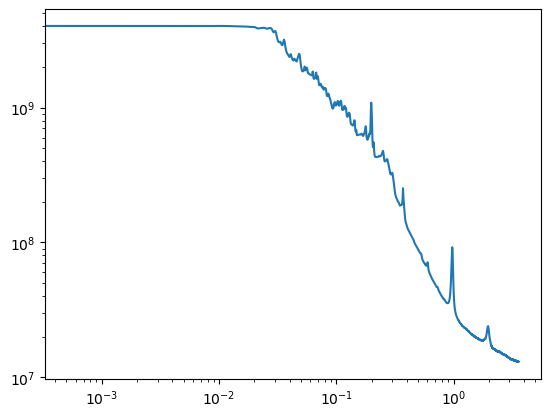

In [24]:
## take the positive values of arrays for eV

# fpl = 23.497
fpl = 23.289
zeropoint = np.where(xs>=0)[0][0]
print(zeropoint)
xpos = xs[zeropoint:]
x_eV = tof_to_eV(xpos, fpl, 0)

spectraLa_pos = spectraLa[:,zeropoint:]
spectraPr_pos = spectraPr[:,zeropoint:]
spectraTb_pos = spectraTb[:,zeropoint:]
spectraTm_pos = spectraTm[:,zeropoint:]
spectraHo_pos = spectraHo[:,zeropoint:]
spectraYb_pos = spectraYb[:,zeropoint:]

plt.loglog(xpos,spectraLa_pos[1])

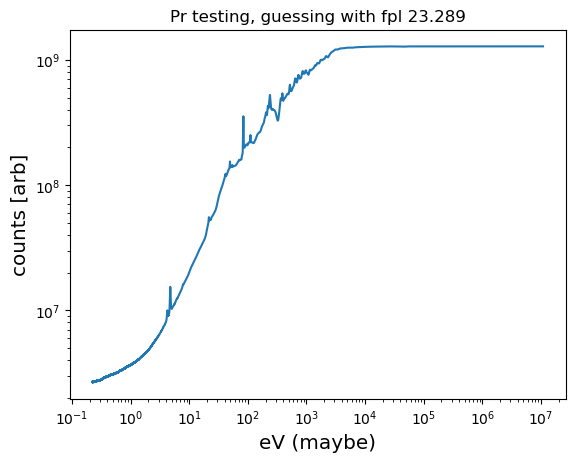

In [25]:
%matplotlib inline

# fpl = 23.5
# fpl = 28.256
# delay = 0 ## get delay from fit below

plt.loglog(x_eV, spectraPr_pos[1])
plt.title(f'Pr testing, guessing with fpl {fpl}')
plt.ylabel('counts [arb]',fontsize = 'x-large')
plt.xlabel('eV (maybe)',fontsize = 'x-large')
plt.show()

# plt.figure()
# plt.plot(xs[2200:], spectraPr_U[1][2200:])

# plt.show()


## Load in ENDF data for each target

In [26]:
########################################### load in ENDF data La
dir_endf= 'F:/LANL/nndc_data/'
dir_endf_La = 'F:/LANL/nndc_data/La/'

dir_La_138 = 'La_138_ng.txt'
dir_La_139 = 'La_139_ng.txt'
dir_La_140 = 'La_140_ng.txt'

La138_df = pd.read_csv(dir_endf_La+dir_La_138, sep = ',')
La139_df = pd.read_csv(dir_endf_La+dir_La_139, sep = ',')
La140_df = pd.read_csv(dir_endf_La+dir_La_140, sep = ',')
La138_df.columns = ['eV', 'b']
La139_df.columns = ['eV', 'b']
La140_df.columns = ['eV', 'b']
print(La138_df['eV'])
La_138_x_endf = np.array(La138_df['eV'])
La_138_y_endf = np.array(La138_df['b'])
La_139_x_endf = np.array(La139_df['eV'])
La_139_y_endf = np.array(La139_df['b'])
La_140_x_endf = np.array(La140_df['eV'])
La_140_y_endf = np.array(La140_df['b'])


0      1.000000e-05
1      1.312410e-05
2      1.708760e-05
3      2.242600e-05
4      2.919870e-05
           ...     
839    1.150000e+07
840    1.200000e+07
841    1.400000e+07
842    1.700000e+07
843    2.000000e+07
Name: eV, Length: 844, dtype: float64


In [27]:
########################################### load in ENDF data Pr
dir_endf= 'F:/LANL/nndc_data/'
dir_endf_Pr = 'F:/LANL/nndc_data/Pr/'

dir_Pr_141 = 'Pr_141_ntot.txt'
dir_Pr_142 = 'Pr_142_ntot.txt'
dir_Pr_143 = 'Pr_143_ntot.txt'

Pr141_df = pd.read_csv(dir_endf_Pr+dir_Pr_141, sep = ',')
Pr142_df = pd.read_csv(dir_endf_Pr+dir_Pr_142, sep = ',')
Pr143_df = pd.read_csv(dir_endf_Pr+dir_Pr_143, sep = ',')
Pr141_df.columns = ['eV', 'b']
Pr142_df.columns = ['eV', 'b']
Pr143_df.columns = ['eV', 'b']
print(Pr141_df['eV'])
Pr_141_x_endf = np.array(Pr141_df['eV'])
Pr_141_y_endf = np.array(Pr141_df['b'])
Pr_142_x_endf = np.array(Pr142_df['eV'])
Pr_142_y_endf = np.array(Pr142_df['b'])
Pr_143_x_endf = np.array(Pr143_df['eV'])
Pr_143_y_endf = np.array(Pr143_df['b'])


0       1.000000e-05
1       1.312410e-05
2       1.708760e-05
3       2.242600e-05
4       2.919870e-05
            ...     
5264    7.000000e+06
5265    1.200000e+07
5266    1.400000e+07
5267    1.750000e+07
5268    2.000000e+07
Name: eV, Length: 5269, dtype: float64


In [28]:
########################################### load in ENDF data Tb
dir_endf= 'F:/LANL/nndc_data/'
dir_endf_Tb = 'F:/LANL/nndc_data/Tb/'

dir_Tb_159 = 'Tb_159_ng.txt'
dir_Tb_160 = 'Tb_160_ng.txt'

Tb159_df = pd.read_csv(dir_endf_Tb+dir_Tb_159, sep = ',')
Tb160_df = pd.read_csv(dir_endf_Tb+dir_Tb_160, sep = ',')
Tb159_df.columns = ['eV', 'b']
Tb160_df.columns = ['eV', 'b']
print(Tb159_df['eV'])
Tb_159_x_endf = np.array(Tb159_df['eV'])
Tb_159_y_endf = np.array(Tb159_df['b'])
Tb_160_x_endf = np.array(Tb160_df['eV'])
Tb_160_y_endf = np.array(Tb160_df['b'])



0       1.000000e-05
1       1.312410e-05
2       1.708760e-05
3       2.242600e-05
4       2.919870e-05
            ...     
8805    1.200000e+07
8806    1.300000e+07
8807    1.500000e+07
8808    1.750000e+07
8809    2.000000e+07
Name: eV, Length: 8810, dtype: float64


In [29]:
########################################### load in ENDF data Ho
dir_endf= 'F:/LANL/nndc_data/'
dir_endf_Ho = 'F:/LANL/nndc_data/Ho/'

dir_Ho_165 = 'Ho_165_ng.txt'
dir_Ho_166 = 'Ho_166_ng.txt'

Ho165_df = pd.read_csv(dir_endf_Ho+dir_Ho_165, sep = ',')
Ho166_df = pd.read_csv(dir_endf_Ho+dir_Ho_166, sep = ',')
Ho165_df.columns = ['eV', 'b']
Ho166_df.columns = ['eV', 'b']
print(Ho165_df['eV'])
Ho_165_x_endf = np.array(Ho165_df['eV'])
Ho_165_y_endf = np.array(Ho165_df['b'])
Ho_166_x_endf = np.array(Ho166_df['eV'])
Ho_166_y_endf = np.array(Ho166_df['b'])


0       1.000000e-05
1       1.312410e-05
2       1.708760e-05
3       2.242600e-05
4       2.919870e-05
            ...     
8939    2.600000e+07
8940    2.710270e+07
8941    2.812130e+07
8942    2.943240e+07
8943    3.000000e+07
Name: eV, Length: 8944, dtype: float64


In [30]:
########################################### load in ENDF data Tm
dir_endf= 'F:/LANL/nndc_data/'
dir_endf_Tm = 'F:/LANL/nndc_data/Tm/'

dir_Tm_168 = 'Tm_168_ng.txt'
dir_Tm_169 = 'Tm_169_ng.txt'
dir_Tm_170 = 'Tm_170_ng.txt'

Tm168_df = pd.read_csv(dir_endf_Tm+dir_Tm_168, sep = ',')
Tm169_df = pd.read_csv(dir_endf_Tm+dir_Tm_169, sep = ',')
Tm170_df = pd.read_csv(dir_endf_Tm+dir_Tm_170, sep = ',')
Tm168_df.columns = ['eV', 'b']
Tm169_df.columns = ['eV', 'b']
Tm170_df.columns = ['eV', 'b']
print(Tm168_df['eV'])
Tm_168_x_endf = np.array(Tm168_df['eV'])
Tm_168_y_endf = np.array(Tm168_df['b'])
Tm_169_x_endf = np.array(Tm169_df['eV'])
Tm_169_y_endf = np.array(Tm169_df['b'])
Tm_170_x_endf = np.array(Tm170_df['eV'])
Tm_170_y_endf = np.array(Tm170_df['b'])


0      1.000000e-05
1      1.312410e-05
2      1.708760e-05
3      2.242600e-05
4      2.919870e-05
           ...     
205    2.400060e+07
206    2.500000e+07
207    2.695920e+07
208    2.912680e+07
209    3.000000e+07
Name: eV, Length: 210, dtype: float64


In [31]:
########################################### load in ENDF data Yb
dir_endf= 'F:/LANL/nndc_data/'
dir_endf_Yb = 'F:/LANL/nndc_data/Yb/'

dir_Yb_168 = 'Yb_168_ng.txt'
dir_Yb_171 = 'Yb_171_ng.txt'
dir_Yb_173 = 'Yb_173_ng.txt'
dir_Yb_170 = 'Yb_170_ng.txt'

Yb168_df = pd.read_csv(dir_endf_Yb+dir_Yb_168, sep = ',')
Yb171_df = pd.read_csv(dir_endf_Yb+dir_Yb_171, sep = ',')
Yb173_df = pd.read_csv(dir_endf_Yb+dir_Yb_173, sep = ',')
Yb170_df = pd.read_csv(dir_endf_Yb+dir_Yb_170, sep = ',')
Yb168_df.columns = ['eV', 'b']
Yb171_df.columns = ['eV', 'b']
Yb173_df.columns = ['eV', 'b']
Yb170_df.columns = ['eV', 'b']
print(Yb171_df['eV'])
Yb_168_x_endf = np.array(Yb168_df['eV'])
Yb_168_y_endf = np.array(Yb168_df['b'])
Yb_171_x_endf = np.array(Yb171_df['eV'])
Yb_171_y_endf = np.array(Yb171_df['b'])
Yb_173_x_endf = np.array(Yb173_df['eV'])
Yb_173_y_endf = np.array(Yb173_df['b'])
Yb_170_x_endf = np.array(Yb170_df['eV'])
Yb_170_y_endf = np.array(Yb170_df['b'])


0       1.000000e-05
1       1.312410e-05
2       1.708760e-05
3       2.242600e-05
4       2.919870e-05
            ...     
8429    1.697860e+07
8430    1.785650e+07
8431    1.885610e+07
8432    1.985680e+07
8433    2.000000e+07
Name: eV, Length: 8434, dtype: float64


#### check sizes

In [32]:
for name, size in sorted(((name, sys.getsizeof(value)) for name, value in list(
                          locals().items())), key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                       allLa_D:  1.4 GiB
                       allLa_U:  1.4 GiB
                       allTb_D:  1.1 GiB
                       allTb_U:  1.1 GiB
                       allTm_D: 474.5 MiB
                       allTm_U: 474.5 MiB
                       allHo_D: 405.8 MiB
                       allHo_U: 405.8 MiB
                       allPr_D: 399.5 MiB
                       allPr_U: 399.5 MiB


In [33]:
## get rid of some shtuff
del allLa_D
del allLa_U
del allTb_D
del allTb_U
del allTm_U
del allTm_D

## comment out after new RAM

In [34]:
for name, size in sorted(((name, sys.getsizeof(value)) for name, value in list(
                          locals().items())), key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                       allHo_D: 405.8 MiB
                       allHo_U: 405.8 MiB
                       allPr_D: 399.5 MiB
                       allPr_U: 399.5 MiB
                       allYb_D: 220.3 MiB
                       allYb_U: 220.3 MiB
                     spectraLa:  1.7 MiB
                     spectraPr:  1.7 MiB
                     spectraTb:  1.7 MiB
                     spectraTm:  1.7 MiB


## Now Plot spectra and get linear fit of s-waves

In [35]:
ch = 20
# fpl = 23.497  ## this is the found one from linear fit... 25 m was first guess
fpl = 23.310
# delay = 0.003
delay = 0
zeropoint = np.where(xs>=0)[0][0]
print(zeropoint)
xpos = xs[zeropoint:]
x_eV = tof_to_eV(xpos, fpl, delay)

1996


C:\Users\gabeo\AppData\Local\Temp\ipykernel_17732\2171555858.py:9: RuntimeWarning: divide by zero encountered in divide
  x_eV_out = 0.5*m_n*((FPlength/((xtof+delay)/1000)))**2*J_to_eV  ## tof in ms


C:\Users\gabeo\AppData\Local\Temp\ipykernel_17732\3733441011.py:30: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim(0, 5.0)


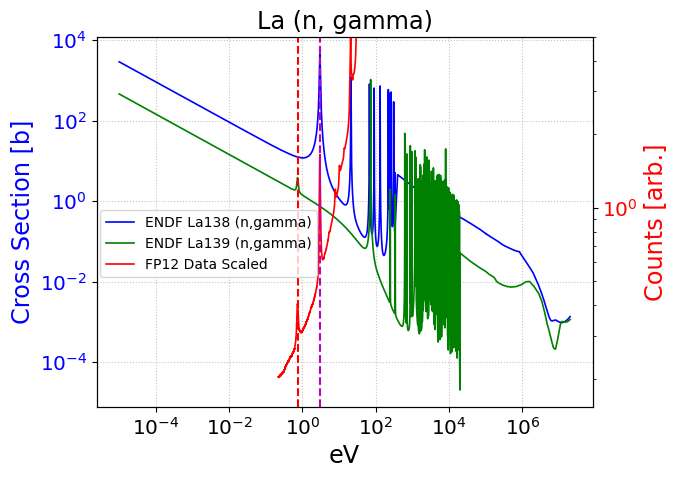

In [36]:

fig, ax1 = plt.subplots()
lw = 1.2
ls1 = 'xx-large'
ls2 = 'x-large'

# Plot the first dataset
ax1.loglog(La_138_x_endf, La_138_y_endf, color='blue', label=f'ENDF La138 (n,gamma)', linewidth = lw)
ax1.loglog(La_139_x_endf, La_139_y_endf, color='green', label=f'ENDF La139 (n,gamma)', linewidth = lw)
# ax1.loglog(La_140_x_endf, La_140_y_endf, color='magenta', label=f'ENDF La140 (n,gamma)', linewidth = lw)
ax1.set_ylabel(r'Cross Section [b]', fontsize=ls1, color = 'blue')
ax1.set_xlabel('eV', fontsize=ls1)
ax1.tick_params(axis='x', labelsize = ls2)
ax1.tick_params(axis='y', labelsize = ls2, labelcolor = 'blue')

# Create a twin axes sharing the x-axis
ax2 = ax1.twinx()

# Plot the second dataset
# ax2.plot(x, ydata, color ='blue',alpha = 0.6)
ax2.loglog(x_eV, spectraLa_pos[ch]/8e7, ls = '-', color='red', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.loglog(x_eV, spectraLa_pos[ch]/10e8, ls = '-', color='cyan', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.set_xlabel('Energy [eV]',fontsize = 'large')
ax2.set_ylabel('Counts [arb.]', fontsize=ls1, color='red')
ax2.tick_params(axis='y', labelsize = ls2, labelcolor = 'red')
plt.axvline(x = 0.7337, ls = '--', c = 'r')
plt.axvline(x = 2.989, ls = '--', c = 'm')

# Set y-axis limits
# ax1.set_ylim(-0.01e9, 0.5e9)
ax2.set_ylim(0, 5.0)

plt.title(r'La (n, gamma)', fontsize = 'xx-large')

ax1.grid(True, which='both',axis = 'both', alpha = 0.75, ls = ':')
ax1.minorticks_on()
# plt.xticks(fontsize = 'xx-large')
# plt.yticks(fontsize = 'x-small')
fig.legend(loc="center left", bbox_to_anchor=(0.12, 0.45))

# plt.legend(fontsize = 'medium')
plt.show()

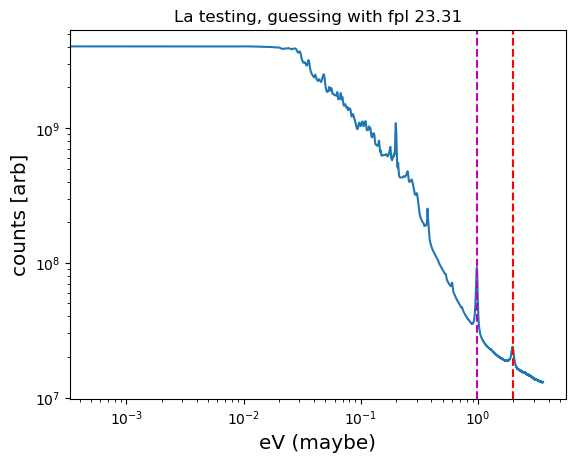

In [37]:
## go back to tof and find res

plt.loglog(xpos, spectraLa_pos[1])
plt.title(f'La testing, guessing with fpl {fpl}')
plt.ylabel('counts [arb]',fontsize = 'x-large')
plt.xlabel('eV (maybe)',fontsize = 'x-large')
plt.axvline(x = eV_to_tof(0.7337, 23.5, 0), ls = '--', c = 'r')
plt.axvline(x = eV_to_tof(2.989, 23.5, 0), ls = '--', c = 'm')

plt.show()

In [38]:
%matplotlib qt
fig, ax1 = plt.subplots(figsize=(10,6.5))
plt.tight_layout(rect=[0.125, 0.130, 0.875, 0.920]) ## left bottom right top
lw = 1.2
ls1 = 'xx-large'
ls2 = 'x-large'
s1 = 0.08  ##scaling factor for endf
s2 = 0.03
# 
# Plot the first dataset
ax1.loglog(Pr_141_x_endf, Pr_141_y_endf*s1, alpha = 0.25, color='blue', label=f'ENDF Pr141 (n,tot)', linewidth = lw)
ax1.loglog(Pr_142_x_endf, Pr_142_y_endf*s1, alpha = 0.25, color='green', label=f'ENDF Pr142 (n,tot)', linewidth = lw)
ax1.loglog(Pr_143_x_endf, Pr_143_y_endf*s2, alpha = 0.25, color='magenta', label=f'ENDF Pr143 (n,tot)', linewidth = lw)
ax1.set_ylabel(r'Cross Section [b]', fontsize=ls1, color = 'blue')
ax1.set_xlabel('eV', fontsize=ls1)
ax1.tick_params(axis='x', labelsize = ls2)
ax1.tick_params(axis='y', labelsize = ls2, labelcolor = 'blue')

# Create a twin axes sharing the x-axis
ax2 = ax1.twinx()

# Plot the second dataset
# ax2.plot(x, ydata, color ='blue',alpha = 0.6)
ax2.loglog(x_eV, spectraPr_pos[ch]/1e2, ls = '-', color='red', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.loglog(x_eV, spectraPr_pos[ch]/10e8, ls = '-', color='cyan', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.set_xlabel('Energy [eV]',fontsize = 'large')
ax2.set_ylabel('Counts [arb.]', fontsize=ls1, color='red')
ax2.tick_params(axis='y', labelsize = ls2, labelcolor = 'red')

# Set y-axis limits
# ax1.set_ylim(-0.01e9, 0.5e9)
# ax2.set_ylim(-0.004, 0.006)

plt.title(r'Pr Spectra', fontsize = 'xx-large')

ax1.grid(True, which='both',axis = 'both', alpha = 0.75, ls = ':')
ax1.minorticks_on()
# plt.xticks(fontsize = 'xx-large')
# plt.yticks(fontsize = 'x-small')
fig.legend(loc="upper right", bbox_to_anchor=(0.90, 0.88))

# plt.legend(fontsize = 'medium')
plt.show()

In [39]:
## go back to tof and find res

plt.loglog(xpos, spectraPr_pos[1])
plt.title(f'Pr testing, guessing with fpl {fpl}')
plt.ylabel('counts [arb]',fontsize = 'x-large')
plt.xlabel('eV (maybe)',fontsize = 'x-large')
plt.axvline(x = eV_to_tof(85.50, 23.5, 0), ls = '--', c = 'r')
plt.show()

In [40]:
%matplotlib qt
fig, ax1 = plt.subplots(figsize=(10,6.5))
plt.tight_layout(rect=[0.125, 0.130, 0.875, 0.920])  ## left bottom right top
lw = 1.2
ls1 = 'xx-large'
ls2 = 'x-large'
s1 = 1

# Plot the first dataset
ax1.loglog(Tb_159_x_endf, Tb_159_y_endf*s1, alpha = 0.25, color='blue', label=f'ENDF Tb159 (n,g)', linewidth = lw)
ax1.loglog(Tb_160_x_endf, Tb_160_y_endf*s1*0.1, alpha = 0.25, color='green', label=f'ENDF Tb160 (n,g)', linewidth = lw)
ax1.set_ylabel(r'Cross Section [b]', fontsize=ls1, color = 'blue')
ax1.set_xlabel('eV', fontsize=ls1)
ax1.tick_params(axis='x', labelsize = ls2)
ax1.tick_params(axis='y', labelsize = ls2, labelcolor = 'blue')

# Create a twin axes sharing the x-axis
ax2 = ax1.twinx()

# Plot the second dataset
# ax2.plot(x, ydata, color ='blue',alpha = 0.6)
ax2.loglog(x_eV, spectraTb_pos[ch]/1e8, ls = '-', color='red', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.loglog(x_eV, spectraTb_pos[ch]/10e8, ls = '-', color='cyan', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.set_xlabel('Energy [eV]',fontsize = 'large')
ax2.set_ylabel('Counts [arb.]', fontsize=ls1, color='red')
ax2.tick_params(axis='y', labelsize = ls2, labelcolor = 'red')

# Set y-axis limits
# ax1.set_ylim(-0.01e9, 0.5e9)
ax2.set_ylim(0.1, 10)

plt.title(r'Tb spectra', fontsize = 'xx-large')

ax1.grid(True, which='both',axis = 'both', alpha = 0.75, ls = ':')
ax1.minorticks_on()
# plt.xticks(fontsize = 'xx-large')
# plt.yticks(fontsize = 'x-small')
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.30))

# plt.legend(fontsize = 'medium')
plt.show()

In [41]:
## go back to tof and find res
plt.figure()
plt.loglog(xpos, spectraTb_pos[ch])
plt.title(f'Tb testing, guessing with fpl {fpl}')
plt.ylabel('counts [arb]',fontsize = 'x-large')
plt.xlabel('eV (maybe)',fontsize = 'x-large')
plt.axvline(x = eV_to_tof(14.401, 23.5, 0), ls = '--', c = 'r')
plt.axvline(x = eV_to_tof(21.1685, 23.5, 0), ls = '--', c = 'm')
plt.axvline(x = eV_to_tof(4.978, 23.5, 0), ls = '--', c = 'g')

plt.show()

In [42]:
%matplotlib qt
fig, ax1 = plt.subplots(figsize=(10,6.5))
plt.tight_layout(rect=[0.125, 0.130, 0.875, 0.920])  ## left bottom right 
lw = 1.2
ls1 = 'xx-large'
ls2 = 'x-large'
s1 = 0.01

# Plot the first dataset
ax1.loglog(Tm_168_x_endf, Tm_168_y_endf*s1, alpha = 0.25, color='blue', label=f'ENDF Tm168 (n,g)', linewidth = lw)
ax1.loglog(Tm_169_x_endf, Tm_169_y_endf*s1, alpha = 0.25, color='green', label=f'ENDF Tm169 (n,g)', linewidth = lw)
ax1.loglog(Tm_170_x_endf, Tm_170_y_endf*s1, alpha = 0.25, color='magenta', label=f'ENDF Tm170 (n,g)', linewidth = lw)
ax1.set_ylabel(r'Cross Section [b]', fontsize=ls1, color = 'blue')
ax1.set_xlabel('eV', fontsize=ls1)
ax1.tick_params(axis='x', labelsize = ls2)
ax1.tick_params(axis='y', labelsize = ls2, labelcolor = 'blue')

# Create a twin axes sharing the x-axis
ax2 = ax1.twinx()

# Plot the second dataset
# ax2.plot(x, ydata, color ='blue',alpha = 0.6)
ax2.loglog(x_eV, spectraTm_pos[ch]/6e5, ls = '-', color='red', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.loglog(x_eV, spectraTm_pos[ch]/10e8, ls = '-', color='cyan', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.set_xlabel('Energy [eV]',fontsize = 'large')
ax2.set_ylabel('Counts [arb.]', fontsize=ls1, color='red')
ax2.tick_params(axis='y', labelsize = ls2, labelcolor = 'red')

# Set y-axis limits
# ax1.set_ylim(-0.01e9, 0.5e9)
ax2.set_ylim(30.0,420)

plt.title(r'Tm spectra', fontsize = 'xx-large')

ax1.grid(True, which='both',axis = 'both', alpha = 0.75, ls = ':')
ax1.minorticks_on()
# plt.xticks(fontsize = 'xx-large'), 0
# plt.yticks(fontsize = 'x-small')
fig.legend(loc="upper right", bbox_to_anchor=(0.90, 0.35))

# plt.legend(fontsize = 'medium')
plt.show()

In [43]:
## go back to tof and find res
plt.figure()
plt.loglog(xpos, spectraTm_pos[ch])
plt.title(f'Tm testing, guessing with fpl {fpl}')
plt.ylabel('counts [arb]',fontsize = 'x-large')
plt.xlabel('eV (maybe)',fontsize = 'x-large')
plt.axvline(x = eV_to_tof(14.315, 23.5, 0), ls = '--', c = 'r')
plt.axvline(x = eV_to_tof(17.4168, 23.5, 0), ls = '--', c = 'g')
# plt.axvline(x = eV_to_tof(44.79, 23.5, 0), ls = '--', c = 'r')
# plt.axvline(x = eV_to_tof(4.98, 23.5), ls = '--', c = 'r')

plt.show()

In [1]:
%matplotlib qt
fig, ax1 = plt.subplots(figsize=(10,6.5))
plt.tight_layout(rect=[0.125, 0.130, 0.875, 0.920])  ## left bottom right 
lw = 1.2
ls1 = 'xx-large'
ls2 = 'x-large'
s1=0.1

# Plot the first dataset
ax1.loglog(Ho_165_x_endf, Ho_165_y_endf*s1, alpha = 0.25, color='blue', label=f'ENDF Ho165 (n,g)', linewidth = lw)
ax1.loglog(Ho_166_x_endf, Ho_166_y_endf*s1, alpha = 0.25, color='green', label=f'ENDF Ho166 (n,g)', linewidth = lw)
ax1.set_ylabel(r'Cross Section [b]', fontsize=ls1, color = 'blue')
ax1.set_xlabel('eV', fontsize=ls1)
ax1.tick_params(axis='x', labelsize = ls2)
ax1.tick_params(axis='y', labelsize = ls2, labelcolor = 'blue')

# Create a twin axes sharing the x-axis
ax2 = ax1.twinx()

# Plot the second dataset
# ax2.plot(x, ydata, color ='blue',alpha = 0.6)
ax2.loglog(x_eV, spectraHo_pos[ch]/8e5, ls = '-', color='red', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.loglog(x_eV, spectraHo_pos[ch]/10e8, ls = '-', color='cyan', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.set_xlabel('Energy [eV]',fontsize = 'large')
ax2.set_ylabel('Counts [arb.]', fontsize=ls1, color='red')
ax2.tick_params(axis='y', labelsize = ls2, labelcolor = 'red')

# Set y-axis limits
# ax1.set_ylim(-0.01e9, 0.5e9)
ax2.set_ylim(44, 500)

plt.title(r'Ho spectra', fontsize = 'xx-large')

ax1.grid(True, which='both',axis = 'both', alpha = 0.75, ls = ':')
ax1.minorticks_on()
# plt.xticks(fontsize = 'xx-large')
# plt.yticks(fontsize = 'x-small')
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.30))

# plt.legend(fontsize = 'medium')
plt.show()

NameError: name 'plt' is not defined

In [45]:
## go back to tof and find res
plt.figure()
plt.loglog(xpos-0.004, spectraHo_pos[ch])
plt.title(f'Ho testing, guessing with fpl {fpl}')
plt.ylabel('counts [arb]',fontsize = 'x-large')
plt.xlabel('eV (maybe)',fontsize = 'x-large')
plt.axvline(x = eV_to_tof(8.172, 23.5, 0), ls = '--', c = 'r')
plt.axvline(x = eV_to_tof(21.187, 23.25, 0), ls = '--', c = 'm')
plt.axvline(x = eV_to_tof(18.2505, 23.25, 0), ls = '--', c = 'g')

plt.show()

In [46]:
print(Yb_170_y_endf.shape)

(2015,)


In [47]:
## try interpolation

iso170 = 0.03
iso171 = 0.14
iso173 = 0.16
# Plot the first dataset
print(Yb_170_x_endf.shape, Yb_170_y_endf.shape)
print(Yb_171_x_endf.shape, Yb_171_y_endf.shape)
print(Yb_173_x_endf.shape, Yb_173_y_endf.shape)
cut_170_x, cut_170_y = Yb_170_x_endf[50:1000], (Yb_170_y_endf*iso170)[50:1000]
print(cut_170_x[0], cut_170_x[-1])

from scipy import interpolate
interp_func = interpolate.interp1d(cut_170_x, cut_170_y, kind = 'linear')
# x_new = np.arange(cut_170_x[0], cut_170_x[-1], cut_170_x[-1]/len(cut_170_x))
x_new = np.logspace(start=cut_170_x[0], stop=cut_170_x[-1], num=8457, base=2)
# print(Yb_170_x_endf[0], Yb_170_x_endf[-1])
# print(Yb_170_x_endf[0:100])
# print(x_new.shape)
# print(x_new[-200:])
# print(x_new[0])


# y_new = interp_func(x_new)
# print(y_new.shape)

# fig, ax1 = plt.subplots()
# lw = 1.2
# ls1 = 'xx-large'
# ls2 = 'x-large'

# iso170 = 0.03
# iso171 = 0.14
# iso173 = 0.16
# # Plot the first dataset
# ax1.loglog(cut_170_x, cut_170_y, color='blue', label=f'ENDF Yb170 (n,g)', ls = '--', marker = '.')
# ax1.loglog(x_new, y_new, color='green', label=f'ENDF Yb170 (n,g)', ls = '--', marker = '.')


(2015,) (2015,)
(8434,) (8434,)
(8457,) (8457,)
4.82521 396.461


In [48]:
%matplotlib qt
fig, ax1 = plt.subplots(figsize=(10,6.5))
plt.tight_layout(rect=[0.125, 0.130, 0.875, 0.920])  ## left bottom right 
lw = 1.2
ls1 = 'xx-large'
ls2 = 'x-large'

iso168=0.0001
iso170 = 0.03
iso171 = 0.14
iso173 = 0.16
# Plot the first dataset
ax1.loglog(Yb_168_x_endf, Yb_168_y_endf*iso168, color='orange', alpha = 0.35, label=f'ENDF Yb168 (n,g)', linewidth = lw)
ax1.loglog(Yb_170_x_endf, Yb_170_y_endf*iso170, color='blue', alpha = 0.25, label=f'ENDF Yb170 (n,g)', linewidth = lw)
ax1.loglog(Yb_171_x_endf, Yb_171_y_endf*iso171, color='green', alpha = 0.25, label=f'ENDF Yb171 (n,g)', linewidth = lw)
ax1.loglog(Yb_173_x_endf, Yb_173_y_endf*iso173, color='magenta', alpha = 0.25, label=f'ENDF Yb173 (n,g)', linewidth = lw)
# ax1.loglog(Yb_173_x_endf, Yb_170_y_endf*iso170+Yb_171_y_endf*iso171+Yb_173_y_endf*iso173, color='magenta', alpha = 0.25, label=f'ENDF Yb173 (n,g)', linewidth = lw)

ax1.set_ylabel(r'Cross Section [b]', fontsize=ls1, color = 'blue')
ax1.set_xlabel('eV', fontsize=ls1)
ax1.tick_params(axis='x', labelsize = ls2)
ax1.tick_params(axis='y', labelsize = ls2, labelcolor = 'blue')

# Create a twin axes sharing the x-axis
ax2 = ax1.twinx()

# Plot the second dataset
# ax2.plot(x, ydata, color ='blue',alpha = 0.6)
# testsub = 500*x_eV**0.6
ax2.loglog(x_eV, spectraYb_pos[ch]/1.9e6, ls = '-', color='red', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.loglog(x_eV, testsub)
# ax2.loglog(x_eV, spectraYb_pos[ch]/10e8, ls = '-', color='cyan', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.set_xlabel('Energy [eV]',fontsize = 'large')
ax2.set_ylabel('Counts [arb.]', fontsize=ls1, color='red')
ax2.tick_params(axis='y', labelsize = ls2, labelcolor = 'red')

# Set y-axis limits
ax1.set_xlim(0.4, 40)
ax2.set_ylim(5, 60)

plt.title(r'Yb spectra', fontsize = 'xx-large')

ax1.grid(True, which='both',axis = 'both', alpha = 0.75, ls = ':')
ax1.minorticks_on()
# plt.xticks(fontsize = 'xx-large')
# plt.yticks(fontsize = 'x-small')
fig.legend(loc="upper right", bbox_to_anchor=(0.36, 0.90))

# plt.legend(fontsize = 'medium')
plt.show()

In [49]:
## go back to tof and find res
plt.figure()
plt.loglog(xpos, spectraYb_pos[ch])
plt.title(f'Yb testing, guessing with fpl {fpl}')
plt.ylabel('counts [arb]',fontsize = 'x-large')
plt.xlabel('eV (maybe)',fontsize = 'x-large')
plt.axvline(x = eV_to_tof(4.508, 23.5, 0), ls = '--', c = 'r')
plt.axvline(x = eV_to_tof(13.035, 23.425, 0), ls = '--', c = 'g')
# plt.axvline(x = eV_to_tof(4.98, 23.5, 0), ls = '--', c = 'r')

plt.show()

### use Spectra to fit s waves, get t0 delay and FPL

In [50]:
from functools import reduce
def factors(n):
    return set(reduce(list.__add__,([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0)))

def rebin(ys, xs, rebinfactor):
    outys = ys.reshape(-1, rebinfactor).mean(axis=1)
    outxs = xs.reshape(-1, rebinfactor).mean(axis=1)
    return outys, outxs

# y = allLa_U[1][1]
# print(len(y))
# rebinfactors = np.sort(np.array(list(factors(len(y)))))
# print(f'possible factors are ', rebinfactors)

# rebinf = rebinfactors[2]
# print(f'using factor {rebinf}')

In [51]:
# Known resonance energies (eV)[0] and measured TOFs (ms)[1]
## below are all of the ones I found
res_found_La = [[0.7337, 2.989],[1.9689, 0.9757]] ## check these
res_found_Pr = [[],[]] ## Pr has really high resonances
res_found_Tb = [[21.1685, 14.401, 4.978],[0.36919, 0.44825,0.7636]]
res_found_Ho = [[8.172, 18.2505, 21.187],[0.5914, 0.398, 0.3695]]
# res_found_Tb = [[14.402, 4.978],[0.44825,0.7636]]
# res_found_Ho = [[8.172, 18.248],[0.595, 0.398]]
res_found_Tm = [[17.4178],[0.4073]]
res_found_Yb = [[4.508, 13.038], [0.8007, 0.4700]] ## Yb from JENDL 2010

print(np.concatenate((res_found_Tb, res_found_Ho, res_found_Tm, res_found_Yb), axis=1))
# print(res_found[1])
print(res_found_Tb[0:,1:])

[[21.1685  14.401    4.978    8.172   18.2505  21.187   17.4178   4.508
  13.038  ]
 [ 0.36919  0.44825  0.7636   0.5914   0.398    0.3695   0.4073   0.8007
   0.47   ]]


TypeError: list indices must be integers or slices, not tuple

In [ ]:
m_n = 1.6749286*10**(-27)
J_to_eV = 6.24151*10**18
eV_to_J = 1.602176565*10**-19
# tof_to_eV = 0.5*m_n*((fpl/(x_tof/1000)))**2  ## tof in ms

# Known resonance energies (eV)[0] and measured TOFs (ms)[1]
res_found_La = [[0.7337, 2.989],[1.9689, 0.9757]]
res_found_Pr = [[],[]] ## Pr has really high resonances
res_found_Tb = [[21.1685, 14.401, 4.978],[0.36919, 0.44825,0.7637]]
res_found_Ho = [[8.172, 18.2505, 21.187],[0.5914, 0.394, 0.3655]]
# res_found_Tb = [[14.402, 4.978],[0.44825,0.7636]]
# res_found_Ho = [[8.172, 18.248],[0.595, 0.398]]
res_found_Tm = [[17.4178],[0.4073]]
res_found_Yb = [[4.508, 13.035], [0.8007, 0.4700]] ## Yb from JENDL 2010
# testres = [[14.400,  4.98],[ 0.4483, 0.6737]]
res_found = np.concatenate((res_found_La, res_found_Tb, res_found_Ho, res_found_Tm, res_found_Yb), axis=1)
# res_found = np.concatenate((res_found_La, res_found_Tb, res_found_Ho, res_found_Tm), axis=1) ## try taking out Yb because of JENDL
# res_found = res_found_Tb

E =      res_found[0]  # try only low eV resonances...
t_meas = res_found[1]   # observed TOF values in ms for each res.
print(t_meas)

# Model function: TOF = t0 + L * sqrt(1 / (72.3 * E))
def tof_model(E, t0, L):
    return t0 + 1000*L*np.sqrt((m_n)/(2*E*eV_to_J))  ## 1000 bc we input/output ms

# Fit
params, cov = curve_fit(tof_model, E, t_meas, p0=[0, 24])
t0_fit, L_fit = params

print(f"Fitted t0 = {t0_fit:.3f} ms")
print(f"Fitted L = {L_fit:.3f} m")

# testline = tof_model(E, *params)
# plt.plot(testline)
print(tof_model(0.75,0,L_fit))
# print(tof_model(0.75,0,23.5))

In [ ]:
%matplotlib inline
temp_rebin_y, temp_rebin_x = rebin(y, xs, rebinf)
# plt.plot(temp_rebin_x, temp_rebin_y)
# plt.show()
# xs_E = 3.895662*10**(-6)*(1/(xs[2001:]/1000)**2)

h = 6.62607015e-34  ## joule-seconds
m = 1.67492749804e-27 ## kg
eV_to_J = 1.602176565e-19 ## conversion factor
m_to_A = 1e10 ## m to Angstrom converstion factor

x_tof = xs
fpl = 23.46 ## flight path length estimate
t_to_eV_test = 0.5*(1.6749286*10**(-27))*((fpl/(x_tof/1000)))**2*(6.24151*10**18) ##*1000 seems to work

plt.plot(t_to_eV_test[2800:], all_U[1][1][2800:])
plt.show()

In [ ]:
print(xs/1000)
print(xs[5850])
print(t_to_eV_test[5850])

### Load ENDF data for imipurities

In [50]:
########################################### load in ENDF data Sm. IMPURITY for Pr
dir_endf= 'F:/LANL/nndc_data/'
dir_endf_Sm = 'F:/LANL/nndc_data/Sm/'

dir_Sm_149 = 'Sm_149_ng.txt'

Sm149_df = pd.read_csv(dir_endf_Sm+dir_Sm_149, sep = ',')

Sm149_df.columns = ['eV', 'b']

# print(Sm149_df['eV'])
Sm_149_x_endf = np.array(Sm149_df['eV'])
Sm_149_y_endf = np.array(Sm149_df['b'])



In [51]:
########################################### load in ENDF data Nd. IMPURITY for Pr
dir_endf= 'F:/LANL/nndc_data/'
dir_endf_Nd = 'F:/LANL/nndc_data/Nd/'

dir_Nd_147 = 'Nd_147_ng.txt'
dir_Nd_145 = 'Nd_145_ng.txt'

Nd147_df = pd.read_csv(dir_endf_Nd+dir_Nd_147, sep = ',')
Nd145_df = pd.read_csv(dir_endf_Nd+dir_Nd_145, sep = ',')

Nd147_df.columns = ['eV', 'b']
Nd145_df.columns = ['eV', 'b']

# print(Nd147_df['eV'])
Nd_147_x_endf = np.array(Nd147_df['eV'])
Nd_147_y_endf = np.array(Nd147_df['b'])

Nd_145_x_endf = np.array(Nd145_df['eV'])
Nd_145_y_endf = np.array(Nd145_df['b'])


In [52]:
## let's just load all
dir_endf= 'F:/LANL/nndc_data/'
dir_endf_Sm = 'F:/LANL/nndc_data/Sm/'
dir_endf_Nd = 'F:/LANL/nndc_data/Nd/'
dir_endf_Tb = 'F:/LANL/nndc_data/Tb/'
dir_endf_Dy = 'F:/LANL/nndc_data/Dy/'
dir_endf_Er = 'F:/LANL/nndc_data/Er/'
dir_endf_Gd = 'F:/LANL/nndc_data/Gd/'
dir_endf_Eu = 'F:/LANL/nndc_data/Eu/'
dir_endf_Ce = 'F:/LANL/nndc_data/Ce/'

dir_Sm_149 = 'Sm_149_ng.txt'
dir_Sm_151 = 'Sm_151_ng.txt'
dir_Sm_152 = 'Sm_152_ng.txt'
dir_Sm_154 = 'Sm_154_ng.txt'
dir_Nd_147 = 'Nd_147_ng.txt'
dir_Nd_142 = 'Nd_142_ng.txt'
dir_Nd_144 = 'Nd_144_ng.txt'
dir_Nd_145 = 'Nd_145_ng.txt'
dir_Dy_156 = 'Dy_156_ng.txt'
dir_Dy_160 = 'Dy_160_ng.txt'
dir_Dy_161 = 'Dy_161_ng.txt'
dir_Dy_162 = 'Dy_162_ng.txt'
dir_Dy_163 = 'Dy_163_ng.txt'
dir_Er_162 = 'Er_162_ng.txt'
dir_Er_167 = 'Er_167_ng.txt'
dir_Gd_152 = 'Gd_152_ng.txt'
dir_Gd_155 = 'Gd_155_ng.txt'
dir_Eu_151 = 'Eu_151_ng.txt'
dir_Eu_153 = 'Eu_153_ng.txt'
dir_Ce_140 = 'Ce_140_ng.txt'
dir_Ce_142 = 'Ce_142_ng.txt'

Sm149_df = pd.read_csv(dir_endf_Sm+dir_Sm_149, sep = ',')
Sm149_df.columns = ['eV', 'b']
Sm_149_x_endf = np.array(Sm149_df['eV'])
Sm_149_y_endf = np.array(Sm149_df['b'])
Sm151_df = pd.read_csv(dir_endf_Sm+dir_Sm_151, sep = ',')
Sm151_df.columns = ['eV', 'b']
Sm_151_x_endf = np.array(Sm151_df['eV'])
Sm_151_y_endf = np.array(Sm151_df['b'])
Sm152_df = pd.read_csv(dir_endf_Sm+dir_Sm_152, sep = ',')
Sm152_df.columns = ['eV', 'b']
Sm_152_x_endf = np.array(Sm152_df['eV'])
Sm_152_y_endf = np.array(Sm152_df['b'])
Sm154_df = pd.read_csv(dir_endf_Sm+dir_Sm_154, sep = ',')
Sm154_df.columns = ['eV', 'b']
Sm_154_x_endf = np.array(Sm154_df['eV'])
Sm_154_y_endf = np.array(Sm154_df['b'])


Nd147_df = pd.read_csv(dir_endf_Nd+dir_Nd_147, sep = ',')
Nd145_df = pd.read_csv(dir_endf_Nd+dir_Nd_145, sep = ',')
Nd147_df.columns = ['eV', 'b']
Nd145_df.columns = ['eV', 'b']
Nd_147_x_endf = np.array(Nd147_df['eV'])
Nd_147_y_endf = np.array(Nd147_df['b'])
Nd_145_x_endf = np.array(Nd145_df['eV'])
Nd_145_y_endf = np.array(Nd145_df['b'])
Nd142_df = pd.read_csv(dir_endf_Nd+dir_Nd_142, sep = ',')
Nd142_df.columns = ['eV', 'b']
Nd_142_x_endf = np.array(Nd142_df['eV'])
Nd_142_y_endf = np.array(Nd142_df['b'])
Nd144_df = pd.read_csv(dir_endf_Nd+dir_Nd_144, sep = ',')
Nd144_df.columns = ['eV', 'b']
Nd_144_x_endf = np.array(Nd144_df['eV'])
Nd_144_y_endf = np.array(Nd144_df['b'])

Dy162_df = pd.read_csv(dir_endf_Dy+dir_Dy_162, sep = ',')
Dy162_df.columns = ['eV', 'b']
Dy_162_x_endf = np.array(Dy162_df['eV'])
Dy_162_y_endf = np.array(Dy162_df['b'])
Dy163_df = pd.read_csv(dir_endf_Dy+dir_Dy_163, sep = ',')
Dy163_df.columns = ['eV', 'b']
Dy_163_x_endf = np.array(Dy163_df['eV'])
Dy_163_y_endf = np.array(Dy163_df['b'])
Dy156_df = pd.read_csv(dir_endf_Dy+dir_Dy_156, sep = ',')
Dy156_df.columns = ['eV', 'b']
Dy_156_x_endf = np.array(Dy156_df['eV'])
Dy_156_y_endf = np.array(Dy156_df['b'])  
Dy160_df = pd.read_csv(dir_endf_Dy+dir_Dy_160, sep = ',')
Dy160_df.columns = ['eV', 'b']
Dy_160_x_endf = np.array(Dy160_df['eV'])
Dy_160_y_endf = np.array(Dy160_df['b'])
Dy161_df = pd.read_csv(dir_endf_Dy+dir_Dy_161, sep = ',')
Dy161_df.columns = ['eV', 'b']
Dy_161_x_endf = np.array(Dy161_df['eV'])
Dy_161_y_endf = np.array(Dy161_df['b'])  

Er162_df = pd.read_csv(dir_endf_Er+dir_Er_162, sep = ',')
Er162_df.columns = ['eV', 'b']
Er_162_x_endf = np.array(Er162_df['eV'])
Er_162_y_endf = np.array(Er162_df['b'])
Er167_df = pd.read_csv(dir_endf_Er+dir_Er_167, sep = ',')
Er167_df.columns = ['eV', 'b']
Er_167_x_endf = np.array(Er167_df['eV'])
Er_167_y_endf = np.array(Er167_df['b'])

Gd152_df = pd.read_csv(dir_endf_Gd+dir_Gd_152, sep = ',')
Gd152_df.columns = ['eV', 'b']
Gd_152_x_endf = np.array(Gd152_df['eV'])
Gd_152_y_endf = np.array(Gd152_df['b'])
Gd155_df = pd.read_csv(dir_endf_Gd+dir_Gd_155, sep = ',')
Gd155_df.columns = ['eV', 'b']
Gd_155_x_endf = np.array(Gd155_df['eV'])
Gd_155_y_endf = np.array(Gd155_df['b'])

Eu151_df = pd.read_csv(dir_endf_Eu+dir_Eu_151, sep = ',')
Eu151_df.columns = ['eV', 'b']
Eu_151_x_endf = np.array(Eu151_df['eV'])
Eu_151_y_endf = np.array(Eu151_df['b'])
Eu153_df = pd.read_csv(dir_endf_Eu+dir_Eu_153, sep = ',')
Eu153_df.columns = ['eV', 'b']
Eu_153_x_endf = np.array(Eu153_df['eV'])
Eu_153_y_endf = np.array(Eu153_df['b'])
print('loaded impurities')

Ce140_df = pd.read_csv(dir_endf_Ce+dir_Ce_140, sep = ',')
Ce140_df.columns = ['eV', 'b']
Ce_140_x_endf = np.array(Ce140_df['eV'])
Ce_140_y_endf = np.array(Ce140_df['b'])
Ce142_df = pd.read_csv(dir_endf_Ce+dir_Ce_142, sep = ',')
Ce142_df.columns = ['eV', 'b']
Ce_142_x_endf = np.array(Ce142_df['eV'])
Ce_142_y_endf = np.array(Ce142_df['b'])

loaded impurities


### plot w impurities

In [54]:
%matplotlib qt
fig, ax1 = plt.subplots(figsize=(10,6.5))
plt.tight_layout(rect=[0.125, 0.130, 0.875, 0.920]) ## left bottom right top
lw = 1.2
ls1 = 'xx-large'
ls2 = 'x-large'
s1 = 1  ##scaling factor for endf
s2 = 1
# 
# Plot the first dataset
ax1.loglog(Pr_141_x_endf, Pr_141_y_endf*s1, alpha = 0.25, color='blue', label=f'ENDF Pr141 (n,tot)', linewidth = lw)
ax1.loglog(Pr_142_x_endf, Pr_142_y_endf*s1, alpha = 0.25, color='green', label=f'ENDF Pr142 (n,tot)', linewidth = lw)
ax1.loglog(Pr_143_x_endf, Pr_143_y_endf*s2, alpha = 0.25, color='magenta', label=f'ENDF Pr143 (n,tot)', linewidth = lw)
## impurities
ax1.loglog(Sm_151_x_endf, Sm_151_y_endf*0.02, alpha = 0.75, color='lightseagreen', label=f'ENDF Sm151 impurity', linewidth = lw)
ax1.loglog(Sm_149_x_endf, Sm_149_y_endf*0.02, alpha = 0.75, color='blue', label=f'ENDF Sm149 impurity', linewidth = lw)
# ax1.loglog(Yb_173_x_endf, Yb_173_y_endf*0.02, color='grey', alpha = 0.75, label=f' ENDF Yb173 impurity', linewidth = lw)
ax1.loglog(Nd_145_x_endf, Nd_145_y_endf*0.003, alpha = 0.75, color='indigo', label=f'ENDF Nd145 impurity', linewidth = lw)
ax1.loglog(Nd_147_x_endf, Nd_147_y_endf*0.003, alpha = 0.75, color='coral', label=f'ENDF Nd147 impurity', linewidth = lw)
ax1.loglog(Yb_173_x_endf, Yb_173_y_endf*0.02, alpha = 0.75, color='goldenrod', label=f'ENDF Yb173 impurity', linewidth = lw)
ax1.loglog(Tb_159_x_endf, Tb_159_y_endf*0.006, alpha = 0.75, color='red', label=f'ENDF Tb159 impurity', linewidth = lw)
## now for .8 eV res
# ax1.loglog(Sm_152_x_endf, Sm_152_y_endf*0.02, alpha = 0.75, color='lightseagreen', label=f'ENDF Sm152 impurity', linewidth = lw)
# ax1.loglog(Gd_152_x_endf, Gd_152_y_endf*0.018, alpha = 0.75, color='blue', label=f'ENDF Gd152 impurity', linewidth = lw)
# ax1.loglog(Gd_155_x_endf, Gd_155_y_endf*0.018, alpha = 0.75, color='grey', label=f'ENDF Gd155 impurity', linewidth = lw)
# ax1.loglog(Yb_170_x_endf, Yb_170_y_endf*0.02, alpha = 0.75, color='indigo', label=f'ENDF Yb170 impurity', linewidth = lw)
# ax1.loglog(Yb_171_x_endf, Yb_171_y_endf*0.02, alpha = 0.75, color='goldenrod', label=f'ENDF Yb171 impurity', linewidth = lw)

ax1.set_ylabel(r'Cross Section [b]', fontsize=ls1, color = 'blue')
ax1.set_xlabel('eV', fontsize=ls1)
ax1.tick_params(axis='x', labelsize = ls2)
ax1.tick_params(axis='y', labelsize = ls2, labelcolor = 'blue')

# Create a twin axes sharing the x-axis
ax2 = ax1.twinx()

# Plot the second dataset
# ax2.plot(x, ydata, color ='blue',alpha = 0.6)
ax2.loglog(x_eV, spectraPr_pos[ch]/9e6, ls = '-', color='red', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.loglog(x_eV, spectraPr_pos[ch]/10e8, ls = '-', color='cyan', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.set_xlabel('Energy [eV]',fontsize = 'large')
ax2.set_ylabel('Counts [arb.]', fontsize=ls1, color='red')
ax2.tick_params(axis='y', labelsize = ls2, labelcolor = 'red')

# Set y-axis limits
# ax1.set_ylim(-0.01e9, 0.5e9)
ax2.set_ylim(0.1, 30)

plt.title(r'Pr Spectra - Impurities', fontsize = 'xx-large')

ax1.grid(True, which='both',axis = 'both', alpha = 0.75, ls = ':')
ax1.minorticks_on()
# plt.xticks(fontsize = 'xx-large')
# plt.yticks(fontsize = 'x-small')
fig.legend(loc="upper right", bbox_to_anchor=(0.90, 0.94))

# plt.legend(fontsize = 'medium')
plt.show()

In [54]:
%matplotlib qt
fig, ax1 = plt.subplots(figsize=(10,6.5))
plt.tight_layout(rect=[0.125, 0.130, 0.875, 0.920]) ## left bottom right top
lw = 1.2
ls1 = 'xx-large'
ls2 = 'x-large'
s1 = 1  ##scaling factor for endf
s2 = 1
# 
# Plot the first dataset
ax1.loglog(Pr_141_x_endf, Pr_141_y_endf*s1, alpha = 0.25, color='blue', label=f'ENDF Pr141 (n,tot)', linewidth = lw)
ax1.loglog(Pr_142_x_endf, Pr_142_y_endf*s1, alpha = 0.25, color='green', label=f'ENDF Pr142 (n,tot)', linewidth = lw)
ax1.loglog(Pr_143_x_endf, Pr_143_y_endf*s2, alpha = 0.25, color='magenta', label=f'ENDF Pr143 (n,tot)', linewidth = lw)
# ax1.loglog(Sm_149_x_endf, Sm_149_y_endf*s2, alpha = 0.25, color='magenta', label=f'ENDF Sm149 impurity', linewidth = lw)
ax1.loglog(Yb_173_x_endf, Yb_173_y_endf*0.02, color='grey', alpha = 0.75, label=f'ENDF Yb173 (n,g)', linewidth = lw)
ax1.loglog(Nd_145_x_endf, Nd_145_y_endf*0.003, alpha = 0.75, color='indigo', label=f'ENDF Nd145 (n,tot)', linewidth = lw)
# ax1.loglog(Nd_147_x_endf, Nd_147_y_endf*s2, alpha = 0.25, color='khaki', label=f'ENDF Nd147 (n,tot)', linewidth = lw)
ax1.set_ylabel(r'Cross Section [b]', fontsize=ls1, color = 'blue')
ax1.set_xlabel('eV', fontsize=ls1)
ax1.tick_params(axis='x', labelsize = ls2)
ax1.tick_params(axis='y', labelsize = ls2, labelcolor = 'blue')

# Create a twin axes sharing the x-axis
ax2 = ax1.twinx()

# Plot the second dataset
# ax2.plot(x, ydata, color ='blue',alpha = 0.6)
ax2.loglog(x_eV, spectraPr_pos[ch]/1e2, ls = '-', color='red', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.loglog(x_eV, spectraPr_pos[ch]/10e8, ls = '-', color='cyan', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.set_xlabel('Energy [eV]',fontsize = 'large')
ax2.set_ylabel('Counts [arb.]', fontsize=ls1, color='red')
ax2.tick_params(axis='y', labelsize = ls2, labelcolor = 'red')

# Set y-axis limits
# ax1.set_ylim(-0.01e9, 0.5e9)
# ax2.set_ylim(-0.004, 0.006)

plt.title(r'Pr Spectra', fontsize = 'xx-large')

ax1.grid(True, which='both',axis = 'both', alpha = 0.75, ls = ':')
ax1.minorticks_on()
# plt.xticks(fontsize = 'xx-large')
# plt.yticks(fontsize = 'x-small')
fig.legend(loc="upper right", bbox_to_anchor=(0.90, 0.88))

# plt.legend(fontsize = 'medium')
plt.show()

In [66]:
%matplotlib qt
fig, ax1 = plt.subplots(figsize=(10,6.5))
plt.tight_layout(rect=[0.125, 0.130, 0.875, 0.920])  ## left bottom right 
lw = 1.2
ls1 = 'xx-large'
ls2 = 'x-large'
s1=0.1

# Plot the first dataset
ax1.loglog(Ho_165_x_endf, Ho_165_y_endf*s1, alpha = 0.25, color='blue', label=f'ENDF Ho165 (n,g)', linewidth = lw)
ax1.loglog(Ho_166_x_endf, Ho_166_y_endf*s1, alpha = 0.25, color='green', label=f'ENDF Ho166 (n,g)', linewidth = lw)
ax1.loglog(Dy_162_x_endf, Dy_162_y_endf*0.002, color='grey', alpha = 0.75, label=f'ENDF Dy162 (impurity?) (n,g)', linewidth = lw)
ax1.loglog(Er_162_x_endf, Er_162_y_endf*0.0009, alpha = 0.75, color='indigo', label=f'ENDF Er162 (impurity?) (n,g)', linewidth = lw)
ax1.loglog(Er_167_x_endf, Er_167_y_endf*0.0009, alpha = 0.75, color='blue', label=f'ENDF Er167 (impurity?) (n,g)', linewidth = lw)
ax1.loglog(Sm_149_x_endf, Sm_149_y_endf*0.0011, alpha = 0.75, color='goldenrod', label=f'ENDF Sm149 (impurity?) (n,g)', linewidth = lw)
ax1.loglog(Sm_151_x_endf, Sm_151_y_endf*0.0011, alpha = 0.75, color='lightseagreen', label=f'ENDF Sm151 impurity', linewidth = lw)
# ax1.loglog(Eu_151_x_endf, Eu_151_y_endf*0.0015, alpha = 0.75, color='lightseagreen', label=f'ENDF Eu151 (impurity?) (n,g)', linewidth = lw)
# ax1.loglog(Eu_153_x_endf, Eu_153_y_endf*0.0015, alpha = 0.75, color='magenta', label=f'ENDF Eu153 (impurity?) (n,g)', linewidth = lw)

ax1.set_ylabel(r'Cross Section [b]', fontsize=ls1, color = 'blue')
ax1.set_xlabel('eV', fontsize=ls1)
ax1.tick_params(axis='x', labelsize = ls2)
ax1.tick_params(axis='y', labelsize = ls2, labelcolor = 'blue')

# Create a twin axes sharing the x-axis
ax2 = ax1.twinx()

# Plot the second dataset
# ax2.plot(x, ydata, color ='blue',alpha = 0.6)
ax2.loglog(x_eV, spectraHo_pos[ch]/3e5, ls = '-', color='red', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.loglog(x_eV, spectraHo_pos[ch]/10e8, ls = '-', color='cyan', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.set_xlabel('Energy [eV]',fontsize = 'large')
ax2.set_ylabel('Counts [arb.]', fontsize=ls1, color='red')
ax2.tick_params(axis='y', labelsize = ls2, labelcolor = 'red')

# Set y-axis limits
# ax1.set_ylim(-0.01e9, 0.5e9)
ax2.set_ylim(44, 500)

plt.title(r'Ho spectra', fontsize = 'xx-large')

ax1.grid(True, which='both',axis = 'both', alpha = 0.75, ls = ':')
ax1.minorticks_on()
# plt.xticks(fontsize = 'xx-large')
# plt.yticks(fontsize = 'x-small')
# fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.40))

# plt.legend(fontsize = 'medium')
plt.show()

In [55]:
%matplotlib qt
fig, ax1 = plt.subplots(figsize=(10,6.5))
plt.tight_layout(rect=[0.125, 0.130, 0.875, 0.920])  ## left bottom right 
lw = 1.2
ls1 = 'xx-large'
ls2 = 'x-large'
s1=0.1

# Plot the first dataset
ax1.loglog(Tb_159_x_endf, Tb_159_y_endf*s1, alpha = 0.25, color='blue', label=f'ENDF Tb159 (n,g)', linewidth = lw)
ax1.loglog(Tb_160_x_endf, Tb_160_y_endf*s1*0.1, alpha = 0.25, color='green', label=f'ENDF Tb160 (n,g)', linewidth = lw)

ax1.loglog(Dy_162_x_endf, Dy_162_y_endf*1.0, color='grey', alpha = 0.75, label=f'ENDF Dy162 (impurity?) (n,g)', linewidth = lw)
ax1.loglog(Dy_163_x_endf, Dy_163_y_endf*1.0, color='lightseagreen', alpha = 0.75, label=f'ENDF Dy163 (impurity?) (n,g)', linewidth = lw)
ax1.loglog(Eu_151_x_endf, Eu_151_y_endf*1.0, alpha = 0.75, color='indigo', label=f'ENDF Eu151 (impurity?) (n,g)', linewidth = lw)
ax1.loglog(Er_167_x_endf, Er_167_y_endf*1.0, alpha = 0.75, color='blue', label=f'ENDF Er167 (impurity?) (n,g)', linewidth = lw)
ax1.loglog(Eu_153_x_endf, Eu_153_y_endf*1.0, alpha = 0.75, color='goldenrod', label=f'ENDF Eu153 (impurity?) (n,g)', linewidth = lw)

ax1.set_ylabel(r'Cross Section [b]', fontsize=ls1, color = 'blue')
ax1.set_xlabel('eV', fontsize=ls1)
ax1.tick_params(axis='x', labelsize = ls2)
ax1.tick_params(axis='y', labelsize = ls2, labelcolor = 'blue')

# Create a twin axes sharing the x-axis
ax2 = ax1.twinx()

# Plot the second dataset
# ax2.plot(x, ydata, color ='blue',alpha = 0.6)
ax2.loglog(x_eV, spectraTb_pos[ch]/1e8, ls = '-', color='red', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.loglog(x_eV, spectraTb_pos[ch]/10e8, ls = '-', color='cyan', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.set_xlabel('Energy [eV]',fontsize = 'large')
ax2.set_ylabel('Counts [arb.]', fontsize=ls1, color='red')
ax2.tick_params(axis='y', labelsize = ls2, labelcolor = 'red')

# Set y-axis limits
# ax1.set_ylim(-0.01e9, 0.5e9)
ax2.set_ylim(0.1, 10)

plt.title(r'Tb spectra - Impurities', fontsize = 'xx-large')

ax1.grid(True, which='both',axis = 'both', alpha = 0.75, ls = ':')
ax1.minorticks_on()
# plt.xticks(fontsize = 'xx-large')
# plt.yticks(fontsize = 'x-small')
# fig.legend(loc="upper right", bbox_to_anchor=(0.90, 0.88))

# plt.legend(fontsize = 'medium')
plt.show()

In [58]:
%matplotlib qt
fig, ax1 = plt.subplots(figsize=(10,6.5))
plt.tight_layout(rect=[0.125, 0.130, 0.875, 0.920])  ## left bottom right 
lw = 1.2
ls1 = 'xx-large'
ls2 = 'x-large'
s1 = 0.01

# Plot the first dataset
# ax1.loglog(Tm_168_x_endf, Tm_168_y_endf*s1, alpha = 0.25, color='blue', label=f'ENDF Tm168 (n,g)', linewidth = lw)
# ax1.loglog(Tm_169_x_endf, Tm_169_y_endf*s1, alpha = 0.25, color='green', label=f'ENDF Tm169 (n,g)', linewidth = lw)
# ax1.loglog(Tm_170_x_endf, Tm_170_y_endf*s1, alpha = 0.25, color='magenta', label=f'ENDF Tm170 (n,g)', linewidth = lw)

ax1.loglog(Yb_168_x_endf, Yb_168_y_endf*0.02, color='grey', alpha = 0.75, label=f'ENDF Yb168 (impurity?) (n,g)', linewidth = lw)
ax1.loglog(Tb_159_x_endf, Tb_159_y_endf*0.006, alpha = 0.75, color='indigo', label=f'ENDF Tb159 (impurity?) (n,g)', linewidth = lw)
# ax1.loglog(Gd_152_x_endf, Gd_152_y_endf*0.001, alpha = 0.75, color='blue', label=f'ENDF Gd152 (impurity?) (n,g)', linewidth = lw)
ax1.loglog(Sm_149_x_endf, Sm_149_y_endf*0.02, alpha = 0.75, color='goldenrod', label=f'ENDF Sm149 (impurity?) (n,g)', linewidth = lw)
ax1.loglog(Sm_151_x_endf, Sm_151_y_endf*0.02, alpha = 0.75, color='lightseagreen', label=f'ENDF Sm151 impurity', linewidth = lw)
# ax1.loglog(Sm_152_x_endf, Sm_152_y_endf*0.02, alpha = 0.75, color='indigo', label=f'ENDF Sm152 (impurity?) (n,g)', linewidth = lw)
ax1.loglog(Nd_147_x_endf, Nd_147_y_endf*0.003, alpha = 0.75, color='blue', label=f'ENDF Nd147 (n,g)', linewidth = lw)
# ax1.loglog(Eu_151_x_endf, Eu_151_y_endf*0.0015, alpha = 0.75, color='lightseagreen', label=f'ENDF Eu151 (impurity?) (n,g)', linewidth = lw)
# ax1.loglog(Eu_153_x_endf, Eu_153_y_endf*0.0015, alpha = 0.75, color='magenta', label=f'ENDF Eu153 (impurity?) (n,g)', linewidth = lw)
ax1.set_ylabel(r'Cross Section [b]', fontsize=ls1, color = 'blue')
ax1.set_xlabel('eV', fontsize=ls1)
ax1.tick_params(axis='x', labelsize = ls2)
ax1.tick_params(axis='y', labelsize = ls2, labelcolor = 'blue')

# Create a twin axes sharing the x-axis
ax2 = ax1.twinx()

# Plot the second dataset
# ax2.plot(x, ydata, color ='blue',alpha = 0.6)
ax2.loglog(x_eV, spectraTm_pos[ch]/6e5, ls = '-', color='red', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.loglog(x_eV, spectraTm_pos[ch]/10e8, ls = '-', color='cyan', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.set_xlabel('Energy [eV]',fontsize = 'large')
ax2.set_ylabel('Counts [arb.]', fontsize=ls1, color='red')
ax2.tick_params(axis='y', labelsize = ls2, labelcolor = 'red')

# Set y-axis limits
# ax1.set_ylim(-0.01e9, 0.5e9)
ax2.set_ylim(30.0,420)

plt.title(r'Tm spectra - Impurities', fontsize = 'xx-large')

ax1.grid(True, which='both',axis = 'both', alpha = 0.75, ls = ':')
ax1.minorticks_on()
# plt.xticks(fontsize = 'xx-large'), 0
# plt.yticks(fontsize = 'x-small')
fig.legend(loc="upper right", bbox_to_anchor=(0.90, 0.35))

# plt.legend(fontsize = 'medium')
plt.show()

In [57]:
%matplotlib qt
fig, ax1 = plt.subplots(figsize=(10,6.5))
plt.tight_layout(rect=[0.125, 0.130, 0.875, 0.920])  ## left bottom right 
lw = 1.2
ls1 = 'xx-large'
ls2 = 'x-large'

iso168=0.0001
iso170 = 0.03
iso171 = 0.14
iso173 = 0.16
# Plot the first dataset
ax1.loglog(Yb_168_x_endf, Yb_168_y_endf*iso168, color='orange', alpha = 0.35, label=f'ENDF Yb168 (n,g)', linewidth = lw)
ax1.loglog(Yb_170_x_endf, Yb_170_y_endf*iso170, color='blue', alpha = 0.25, label=f'ENDF Yb170 (n,g)', linewidth = lw)
ax1.loglog(Yb_171_x_endf, Yb_171_y_endf*iso171, color='green', alpha = 0.25, label=f'ENDF Yb171 (n,g)', linewidth = lw)
ax1.loglog(Yb_173_x_endf, Yb_173_y_endf*iso173, color='magenta', alpha = 0.25, label=f'ENDF Yb173 (n,g)', linewidth = lw)
# ax1.loglog(Yb_173_x_endf, Yb_170_y_endf*iso170+Yb_171_y_endf*iso171+Yb_173_y_endf*iso173, color='magenta', alpha = 0.25, label=f'ENDF Yb173 (n,g)', linewidth = lw)

ax1.loglog(Dy_156_x_endf, Dy_156_y_endf*0.02, color='grey', alpha = 0.75, label=f'ENDF Dy156 (impurity?) (n,g)', linewidth = lw)
ax1.loglog(Dy_160_x_endf, Dy_160_y_endf*0.02, color='indigo', alpha = 0.75, label=f'ENDF Dy160 (impurity?) (n,g)', linewidth = lw)
ax1.loglog(Dy_161_x_endf, Dy_161_y_endf*0.02, color='goldenrod', alpha = 0.75, label=f'ENDF Dy161 (impurity?) (n,g)', linewidth = lw)
ax1.loglog(Gd_152_x_endf, Gd_152_y_endf*0.001, alpha = 0.75, color='lightseagreen', label=f'ENDF Gd152 impurity', linewidth = lw)
# ax1.loglog(Gd_155_x_endf, Gd_155_y_endf*0.001, alpha = 0.75, color='lightseagreen', label=f'ENDF Gd155 impurity', linewidth = lw)
ax1.loglog(Er_167_x_endf, Er_167_y_endf*0.0055, alpha = 0.75, color='green', label=f'ENDF Er167 (impurity?) (n,g)', linewidth = lw)
# ax1.loglog(Tb_159_x_endf, Tb_159_y_endf*0.001, alpha = 0.75, color='indigo', label=f'ENDF Tb159 (impurity?) (n,g)', linewidth = lw)

ax1.set_ylabel(r'Cross Section [b]', fontsize=ls1, color = 'blue')
ax1.set_xlabel('eV', fontsize=ls1)
ax1.tick_params(axis='x', labelsize = ls2)
ax1.tick_params(axis='y', labelsize = ls2, labelcolor = 'blue')

# Create a twin axes sharing the x-axis
ax2 = ax1.twinx()

# Plot the second dataset
# ax2.plot(x, ydata, color ='blue',alpha = 0.6)
# testsub = 500*x_eV**0.6
ax2.loglog(x_eV, spectraYb_pos[ch]/1.9e6, ls = '-', color='red', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.loglog(x_eV, testsub)
# ax2.loglog(x_eV, spectraYb_pos[ch]/10e8, ls = '-', color='cyan', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.set_xlabel('Energy [eV]',fontsize = 'large')
ax2.set_ylabel('Counts [arb.]', fontsize=ls1, color='red')
ax2.tick_params(axis='y', labelsize = ls2, labelcolor = 'red')

# Set y-axis limits
ax1.set_xlim(0.4, 40)
ax2.set_ylim(5, 60)

plt.title(r'Yb spectra - Impurities', fontsize = 'xx-large')

ax1.grid(True, which='both',axis = 'both', alpha = 0.75, ls = ':')
ax1.minorticks_on()
# plt.xticks(fontsize = 'xx-large')
# plt.yticks(fontsize = 'x-small')
# fig.legend(loc="upper right", bbox_to_anchor=(0.36, 0.90))

# plt.legend(fontsize = 'medium')
plt.show()

In [64]:
plt.plot(spectraYb_pos[ch]/1.9e6, ls = '-', color='red', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)

In [59]:
%matplotlib qt
fig, ax1 = plt.subplots(figsize=(10,6.5))
plt.tight_layout(rect=[0.125, 0.130, 0.875, 0.920])  ## left bottom right 
lw = 1.2
ls1 = 'xx-large'
ls2 = 'x-large'

# Plot the first dataset
ax1.loglog(La_138_x_endf, La_138_y_endf, color='black', alpha = 1.0, label=f'ENDF La138 (n,g)', linewidth = lw)
ax1.loglog(La_139_x_endf, La_139_y_endf, color='black', alpha = 1.0, label=f'ENDF La139 (n,g)', linewidth = lw)
ax1.loglog(La_140_x_endf, La_140_y_endf, color='black'  , alpha = 1.0, label=f'ENDF La140 (n,g)', linewidth = lw)

# ax1.loglog(Ce_140_x_endf, Ce_140_y_endf*0.02, alpha = 0.75, label=f'ENDF Ce140 (impurity?) (n,g)', linewidth = lw)
# ax1.loglog(Ce_142_x_endf, Ce_142_y_endf*0.02, alpha = 0.75, label=f'ENDF Ce142 (impurity?) (n,g)', linewidth = lw)

# ax1.loglog(Nd_144_x_endf, Nd_144_y_endf*0.13, alpha = 0.75, label=f'ENDF Nd144 (impurity?) (n,g)', linewidth = lw)
# ax1.loglog(Nd_142_x_endf, Nd_142_y_endf*0.13, alpha = 0.75, label=f'ENDF Nd142 (impurity?) (n,g)', linewidth = lw)
ax1.loglog(Nd_145_x_endf, Nd_145_y_endf*0.13, alpha = 0.75, label=f'ENDF Nd145 (impurity?) (n,g)', linewidth = lw)
ax1.loglog(Nd_147_x_endf, Nd_147_y_endf*0.13, alpha = 0.75, label=f'ENDF Nd147 (impurity?) (n,g)', linewidth = lw)

# ax1.loglog(Pr_141_x_endf, Pr_141_y_endf*0.01, alpha = 0.75, label=f'ENDF Pr141 (impurity?) (n,tot)', linewidth = lw)
# ax1.loglog(Pr_142_x_endf, Pr_142_y_endf*0.01, alpha = 0.75, label=f'ENDF Pr142 (impurity?) (n,tot)', linewidth = lw)
# ax1.loglog(Pr_143_x_endf, Pr_143_y_endf*0.01, alpha = 0.75, label=f'ENDF Pr143 (impurity?) (n,tot)', linewidth = lw)

ax1.loglog(Sm_149_x_endf, Sm_149_y_endf*0.02, alpha = 0.75, label=f'ENDF Sm149 (impurity?) (n,g)', linewidth = lw)
ax1.loglog(Sm_151_x_endf, Sm_151_y_endf*0.02, alpha = 0.75, label=f'ENDF Sm151 (impurity?) (n,g)', linewidth = lw)
ax1.loglog(Sm_152_x_endf, Sm_152_y_endf*0.02, alpha = 0.75, label=f'ENDF Sm152 (impurity?) (n,g)', linewidth = lw)
# ax1.loglog(Sm_154_x_endf, Sm_154_y_endf*0.02, alpha = 0.75, label=f'ENDF Sm154 (impurity?) (n,g)', linewidth = lw)

ax1.set_ylabel(r'Cross Section [b, relative]', fontsize=ls1, color = 'blue')
ax1.set_xlabel('eV', fontsize=ls1)
ax1.tick_params(axis='x', labelsize = ls2)
ax1.tick_params(axis='y', labelsize = ls2, labelcolor = 'blue')

# Create a twin axes sharing the x-axis
ax2 = ax1.twinx()

# Plot the second dataset
# ax2.plot(x, ydata, color ='blue',alpha = 0.6)
# testsub = 500*x_eV**0.6
ax2.loglog(x_eV, spectraLa_pos[ch]/1.9e6, ls = '-', color='red', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.loglog(x_eV, testsub)
# ax2.loglog(x_eV, spectraYb_pos[ch]/10e8, ls = '-', color='cyan', alpha = 1.0, label='FP12 Data Scaled', linewidth = lw)
# ax2.set_xlabel('Energy [eV]',fontsize = 'large')
ax2.set_ylabel('Counts [arb.]', fontsize=ls1, color='red')
ax2.tick_params(axis='y', labelsize = ls2, labelcolor = 'red')

# Set y-axis limits
ax1.set_xlim(0.4, 40)
ax2.set_ylim(5, 60)

plt.title(r'La spectra - Impurities', fontsize = 'xx-large')

ax1.grid(True, which='both',axis = 'both', alpha = 0.75, ls = ':')
ax1.minorticks_on()
# plt.xticks(fontsize = 'xx-large')
# plt.yticks(fontsize = 'x-small')
# fig.legend(loc="upper right", bbox_to_anchor=(0.36, 0.90))

# plt.legend(fontsize = 'medium')
plt.show()

## some fitting stuff

In [14]:
## try with chat gpt lol

In [15]:
@njit
def polyN_fit_errors(x, y, degree):
    """Fit y = a0*x^n + a1*x^(n-1) + ... + an using least squares and return errors.
Parameters:
        x : 1D array of inputs
        y : 1D array of outputs
        degree : int, degree of polynomial
Returns:
        coeffs : array of fitted coefficients [a0, a1, ..., an]
        stderr : array of standard errors (1-sigma) for each coefficient"""
    n = x.shape[0]
    A = np.empty((n, degree + 1))
    for i in range(n):
        xi = x[i]
        A[i, degree] = 1.0
        for j in range(degree - 1, -1, -1):
            A[i, j] = A[i, j + 1] * xi

    ATA = A.T @ A
    ATy = A.T @ y
    coeffs = np.linalg.solve(ATA, ATy)

    # Calculate residuals and variance
    y_fit = A @ coeffs
    residuals = y - y_fit
    dof = n - (degree + 1)
    residual_variance = np.sum(residuals**2) / dof

    # Covariance matrix and standard errors
    cov_matrix = np.linalg.inv(ATA) * residual_variance
    stderr = np.sqrt(np.diag(cov_matrix))

    return coeffs, stderr

def polyN_predict(x, coeffs):
    """Evaluate polynomial at x using Horner's method.
Parameters:
        x : 1D array of input data
        coeffs : 1D array of coefficients [a0, a1, ..., an]
Returns:
        y : predicted values"""
    n = x.shape[0]
    y = np.empty(n)
    degree = coeffs.shape[0]
    for i in range(n):
        xi = x[i]
        yi = coeffs[0]
        for j in range(1, degree):
            yi = yi * xi + coeffs[j]
        y[i] = yi
    return y

# @njit  ### this doesn't work right now
# def polyN_residuals(x, y, coeffs):
#     """
#     Compute residuals y - y_fit.
#     """
#     y_fit = polyN_predict(x, coeffs)
#     return y - y_fit

In [16]:
## try the function to also output reduced chi square for determining goodness of fit

@njit
def polyN_fit_chi2(x, y, degree):
    """
    Fit a polynomial of given degree to (x, y) using least squares.

    Returns:
        coeffs : fitted polynomial coefficients [a0, a1, ..., an]
        stderr : standard errors (1-sigma) of the coefficients
        red_chi2 : reduced chi-squared (chi2 / dof), assumes sigma_i = 1
    """
    n = x.shape[0]
    A = np.empty((n, degree + 1))
    for i in range(n):
        xi = x[i]
        A[i, degree] = 1.0
        for j in range(degree - 1, -1, -1):
            A[i, j] = A[i, j + 1] * xi

    ATA = A.T @ A
    ATy = A.T @ y
    coeffs = np.linalg.solve(ATA, ATy)

    # Predicted values and residuals
    y_fit = A @ coeffs
    residuals = y - y_fit

    dof = n - (degree + 1)
#     dof=1
    chi2 = np.sum(residuals**2)
    red_chi2 = chi2 / dof

    cov_matrix = np.linalg.inv(ATA) * red_chi2
    stderr = np.sqrt(np.diag(cov_matrix))

    return coeffs, stderr, red_chi2

@njit
def polyN_fit_chi2_w(x, y, sigma, degree):
    """
    Weighted least squares polynomial fit of any degree.

    Parameters:
        x : 1D array of input data
        y : 1D array of target data
        sigma : 1D array of standard deviation (uncertainty) of each y
        degree : degree of the polynomial

    Returns:
        coeffs : polynomial coefficients [a0, a1, ..., an]
        stderr : standard error (1-sigma) of each coefficient
        red_chi2 : reduced chi-squared of the fit
    """
    n = x.shape[0]
    A = np.empty((n, degree + 1))
    for i in range(n):
        xi = x[i]
        A[i, degree] = 1.0
        for j in range(degree - 1, -1, -1):
            A[i, j] = A[i, j + 1] * xi

    # Apply weights: divide rows by sigma
    for i in range(n):
        for j in range(degree + 1):
            A[i, j] /= sigma[i]

    y_weighted = y / sigma

    ATA = A.T @ A
    ATy = A.T @ y_weighted
    coeffs = np.linalg.solve(ATA, ATy)

    # Residuals and reduced chi-squared
    y_fit = A @ coeffs
    residuals = y_weighted - y_fit
    chi2 = np.sum(residuals**2)
    dof = n - (degree + 1)
    red_chi2 = chi2 / dof

    cov_matrix = np.linalg.inv(ATA) * red_chi2
    stderr = np.sqrt(np.diag(cov_matrix))

    return coeffs, stderr, red_chi2

def polyN_fit_chi2_w2(x, y, sigma, degree):
    """
    Weighted least squares polynomial fit of any degree.
    
    Returns:
        coeffs : polynomial coefficients
        stderr : 1-sigma error for each coefficient
        red_chi2 : reduced chi-squared
        residuals : y - y_fit (unweighted)
    """
    n = x.shape[0]
    A = np.empty((n, degree + 1))
    for i in range(n):
        xi = x[i]
        A[i, degree] = 1.0
        for j in range(degree - 1, -1, -1):
            A[i, j] = A[i, j + 1] * xi

    # Apply weights
    for i in range(n):
        for j in range(degree + 1):
            A[i, j] /= sigma[i]
    y_weighted = y / sigma

    ATA = A.T @ A
    ATy = A.T @ y_weighted
    coeffs = np.linalg.solve(ATA, ATy)

    # Compute fitted values and residuals
    y_fit = A @ coeffs
    residuals = y_weighted - y_fit

    chi2 = np.sum(residuals**2)
    dof = n - (degree + 1)
#     dof=1
    red_chi2 = chi2 / dof

    cov_matrix = np.linalg.inv(ATA) * red_chi2
    stderr = np.sqrt(np.diag(cov_matrix))

    # Convert residuals back to original units
    res_unweighted = (y_weighted - y_fit) * sigma

    return coeffs, stderr, red_chi2, res_unweighted

### now select the background region around the resonance of interest

In [17]:
## plot different orders of polynomial
## can I scale chi2 by a constant value?

%matplotlib qt

bg_region1_beg = 4180
bg_region1_end = 5450
bg_region2_beg = 6250
bg_region2_end = 8992
bg_reg1 = [bg_region1_beg,bg_region1_end]
bg_reg2 = [bg_region2_beg,bg_region2_end]
fullrange = bg_reg2[1]-bg_reg1[0]

start = time.time()
aft_res_reg = bg_reg2
bef_res_reg = bg_reg1

binstot = aft_res_reg[1]-bef_res_reg[0]  ## total number of bins in whole region
x1 = np.arange(bef_res_reg[0], bef_res_reg[1],1)
x2 = np.arange(aft_res_reg[0], aft_res_reg[1],1)
x = np.append(x1,x2)

fullx = np.arange(bef_res_reg[0], aft_res_reg[1],1) ## an array of every x bin in entire region
ys_bgsub = []

ys = all_D[0][0]

fitdata1 = ys[bef_res_reg[0]: bef_res_reg[1]]
fitdata2 = ys[aft_res_reg[0]: aft_res_reg[1]]
datasplice = np.append(fitdata1, fitdata2)
y = datasplice
linecolors = ['lies','g','r','c','m','y']
f = 100

plt.plot(fullx, ys[bef_res_reg[0]: aft_res_reg[1]]/f)
rebinf = 12
allchi2 = []
# x_scaled = (x - np.mean(x)) / np.std(x)
# y_scaled = (y - np.mean(y)) / np.std(y)
# x_scaled = x/1000
y_scaled = (y)/f
# x = x_scaled  ## try this for reasonable chi2 values
y = y_scaled
sigma = np.full_like(x, 1)

coeffs, errs, chi2, residuals = polyN_fit_chi2_w2(x,y,sigma,5) ## use residuals from 5th order poly as sigmas
sigma_from_resid = np.full_like(y_scaled, np.std(residuals))
sigma = sigma_from_resid

for i in range(1,6):
    # Fit model
    print(i)
#     coeffs, errs, chi2 = polyN_fit_chi2(x,y,i)
    coeffs, errs, chi2 = polyN_fit_chi2_w(x,y,sigma,i)
#     coeffs, errs, chi2, residuals = polyN_fit_chi2_w2(x,y,sigma,i)
#     sigma_from_resid = np.full_like(y_scaled, np.std(residuals))
    
#     coeffs, errs, chi2, residuals = polyN_fit_chi2_w2(x,y,sigma_from_resid,i)
    print("Fitted Coefficients:", coeffs)
    print('Uncertainty: ', errs)
    print('reduced chi squared: ', chi2)
    # Predict
    y_fit = polyN_predict(x, coeffs)

    # # Residuals (optional)
    # res = polyN_residuals(x, y, coeffs)
    # print("residuals:", res)

    fullpoly_y2 = polyN_predict(fullx, coeffs)

    ys_bgsub=[]
    bgsubtracted = ys[bef_res_reg[0]:aft_res_reg[1]]/f - fullpoly_y2  ## subtracts RealData-BackgroundFit
    ys_bgsub.append(bgsubtracted)
    ys_bgsub[0] ## the array notation is left over from before...
    chi2 = np.round(chi2,5)
    plt.plot(x, y_fit, label = rf'poly fit order {i}, Chi^{2}/ndf = {chi2}', ls = '--', c=linecolors[i], lw = '2')
#     plt.plot(fullx, ys_bgsub[0], label = rf'bg subtracted poly order {i}',c=linecolors[i])
    y_plotrebin, xs_plotrebin = rebin(ys_bgsub[0], fullx, rebinf)
    plt.plot(xs_plotrebin,y_plotrebin, label = rf'bg subtracted poly order {i}',c=linecolors[i])
    print(("max y:", np.max(y)))
    print("residuals:", y - y_fit)
    print("residuals mean:", np.mean(np.abs(y - y_fit)))
    print()

plt.title(rf'Background fits of various orders (rebinned)', fontsize = 'xx-large')

# plt.xticks(np.arange(-1.0,4.0, 0.5),fontsize = 'large')
plt.grid(True, which='both', alpha = 0.5, ls = ':')
plt.minorticks_on()
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')

plt.ylabel('counts [arb]',fontsize = 'x-large')
plt.xlabel('bins [arb]',fontsize = 'x-large')

plt.legend(fontsize = 'medium')
plt.show()

print(ys_bgsub)

end = time.time()
print(end-start, 'sec')
# plt.plot(x, y_fit)

1
Fitted Coefficients: [-1.11969467e-02  1.51761496e+02]
Uncertainty:  [6.9531299e-05 4.7919886e-01]
reduced chi squared:  3.677847548148879
('max y:', 133.7401545526818)
residuals: [18.00412629 18.69057717 18.90772558 ...  7.75337699  4.75055956
  6.43846841]
residuals mean: 5.112830365995852

2
Fitted Coefficients: [ 2.87254560e-06 -4.87415528e-02  2.68082764e+02]
Uncertainty:  [3.64986829e-08 4.79030693e-04 1.50820502e+00]
reduced chi squared:  1.445457026982358
('max y:', 133.7401545526818)
residuals: [ 8.42904567  9.12902381  9.35969373 ... -3.18720449 -6.20412282
 -4.53032061]
residuals mean: 3.1614380458867815

3
Fitted Coefficients: [-9.73986252e-10  2.23232646e-05 -1.74631954e-01  5.30873942e+02]
Uncertainty:  [2.78549906e-11 5.57187251e-07 3.62467684e-03 7.63065943e+00]
reduced chi squared:  1.1078632885125579
('max y:', 133.7401545526818)
residuals: [ 3.14372955  3.85803648  4.10302072 ...  1.42677907 -1.5778266
  0.1083019 ]
residuals mean: 2.7956925725450974

4
Fitted Coef

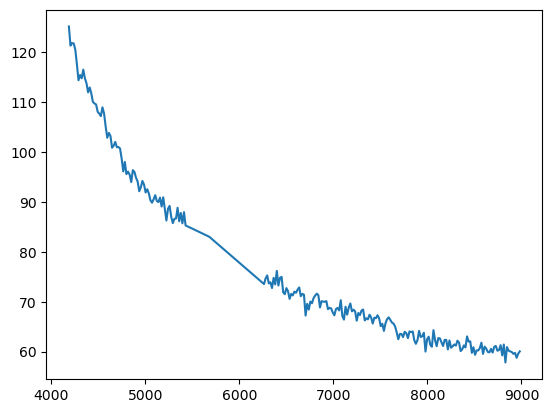

In [18]:
## for plotting
%matplotlib inline

rebinf = 17
y_plotrebin, xs_plotrebin = rebin(y, x, rebinf)
# All_Li6_asyms_rebin8, xs_plotrebin = rebin(All_Li6_asyms, xs_cut[0], rebinf)

# print(len(All_NaI_asyms_rebin8))
# print(len(xs_cut_rebin8))
plt.plot(xs_plotrebin,y_plotrebin)

## bg fits - use this !!

In [19]:
bg_region1_beg = 4180
bg_region1_end = 5450
bg_region2_beg = 6250
bg_region2_end = 8992
bg_reg1 = [bg_region1_beg,bg_region1_end]
bg_reg2 = [bg_region2_beg,bg_region2_end]
fullrange = bg_reg2[1]-bg_reg1[0]

## change to 2nd order poly in cleaned up version
start = time.time()

# @njit
def bg_fitsubtract_noseq(bef_res_reg, aft_res_reg, ys, order): ## before/after resonance region [start:end] respectively, ys[ch] to fit
    binstot = aft_res_reg[1]-bef_res_reg[0]  ## total number of bins in whole region
    x1 = np.arange(bef_res_reg[0], bef_res_reg[1],1)
    x2 = np.arange(aft_res_reg[0], aft_res_reg[1],1)
    x = np.append(x1,x2)
    fullx = np.arange(bef_res_reg[0], aft_res_reg[1],1) ## an array of every x bin in entire region
    ys_bgsub = []
    fitdata1 = ys[bef_res_reg[0]: bef_res_reg[1]]
    fitdata2 = ys[aft_res_reg[0]: aft_res_reg[1]]
    datasplice = np.append(fitdata1, fitdata2)
    y = datasplice
    
    coeffs, errs = polyN_fit_errors(x, y,order) # use new fit functions 
#     print("Fitted Coefficients:", coeffs)
#     print('Uncertainty ', errs)
    y_fit = polyN_predict(x, coeffs) ## run the function with the coeff you just found
    fullpoly_y2 = polyN_predict(fullx, coeffs)

    bgsubtracted = ys[bef_res_reg[0]:aft_res_reg[1]] - fullpoly_y2  ## subtracts RealData-BackgroundFit
    ys_bgsub.append(bgsubtracted)
    return ys_bgsub[0] ## the array notation is left over from before...

## background subtraction currently only for NaI detectors
num_fittingchs = numchannels-1  ## removes the Li detector, assumes it is there
print(num_fittingchs)
bgsub_D = np.zeros((numruns_tot_D, num_fittingchs,fullrange), dtype = np.float64) ## num runs, channels, range of bg_ subtraction
bgsub_U = np.zeros((numruns_tot_U, num_fittingchs,fullrange), dtype = np.float64) ## num runs, channels, range of bg_ subtraction
times3 = []
polyorder = 4
addtimes=0
for r in range(0, len(all_D)): ## for every run
#     print(r)
    start = time.time()
    if r == 0 or r==100 or r==200 or r==300 or r==400 or r==500 or r==len(all_D)-1:
        print(rf'run {r}, '+'100 runs took '+str(addtimes))
        addtimes=0
    for ch in range(0, num_fittingchs): ## and every channel (except 6Li)
        if channels_D[ch] == 'ch_24':
            emessage = ('bg_ fit does not work for 6Li yet')
            logger.error('run '+run_num + emessage)
            raise Exception(emessage)
#         print(r, ch)
#         print(channels[ch])
#         print(len(bgsub_D[r][ch]))
#         print(len(all_D[r][ch]))
        bgsub_D[r][ch] = bg_fitsubtract_noseq(bg_reg1,bg_reg2, all_D[r][ch], polyorder)
        bgsub_U[r][ch] = bg_fitsubtract_noseq(bg_reg1,bg_reg2, all_U[r][ch], polyorder)
    end = time.time()
    addtimes = addtimes+(end-start)
    times3.append(end-start)
#     print('run took '+str(end-start))

12
run 0, 100 runs took 0
run 100, 100 runs took 31.604557991027832
run 200, 100 runs took 31.851542711257935
run 300, 100 runs took 31.869789123535156
run 400, 100 runs took 32.14533352851868
run 500, 100 runs took 32.066081047058105
run 647, 100 runs took 47.435800313949585


648
12
4812


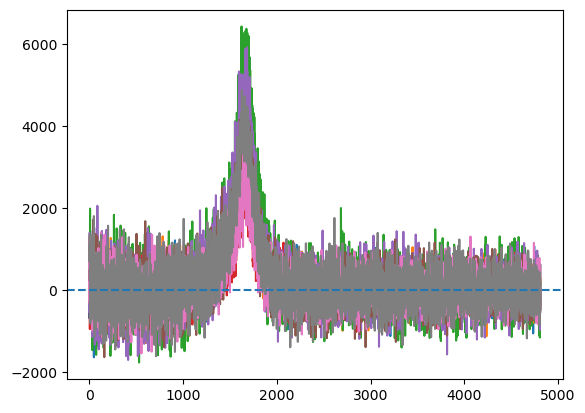

In [30]:
print(len(bgsub_D))
print(len(bgsub_D[0]))
print(len(bgsub_D[0][0]))

%matplotlib inline
for ch in range(0,8):
    ch = ch
    r  = 330
    plt.plot(bgsub_D[r][ch])
plt.axhline(y=0, ls = '--')

In [31]:
print(bgsub_D[0][0])

[  28.01309786  100.65445641  126.36124637 ... -152.47184844 -454.17619344
 -286.80945927]


[[   28.01309786   100.65445641   126.36124637 ...  -152.47184844
   -454.17619344  -286.80945927]
 [  184.69712408   250.22093231   749.98896593 ...  -323.53123359
   -161.24930441   -29.8337121 ]
 [  472.73927125    82.41288183   592.91346206 ...   318.61030115
   -319.82802403  -557.1479768 ]
 ...
 [ -105.5574761    690.83814507  1138.02711251 ...  -646.013869
   -692.13910421  -175.93050173]
 [  777.2448483   1116.6978003    881.50947556 ...  -461.54025412
   -606.4250339  -1014.21981508]
 [  881.29276258   238.21968329   124.05822157 ...  -449.81470162
    126.25906545    70.43282037]]
[  28.01309786  100.65445641  126.36124637 ... -152.47184844 -454.17619344
 -286.80945927]
648
12
4812
648
13
8992


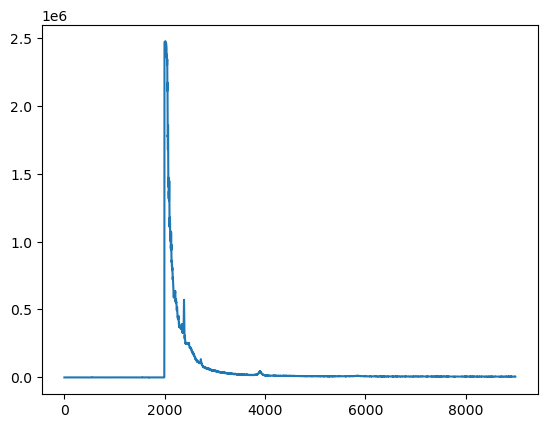

In [32]:
print(bgsub_D[0])
print(bgsub_D[0][0])
print(len(bgsub_D))
print(len(bgsub_D[0]))
print(len(bgsub_D[0][0]))
print(len(all_D))
print(len(all_D[0]))
print(len(all_D[0][0]))
plt.plot(all_D[0][0])

In [23]:
### fix last half being 0s
### fix voigt fitting...

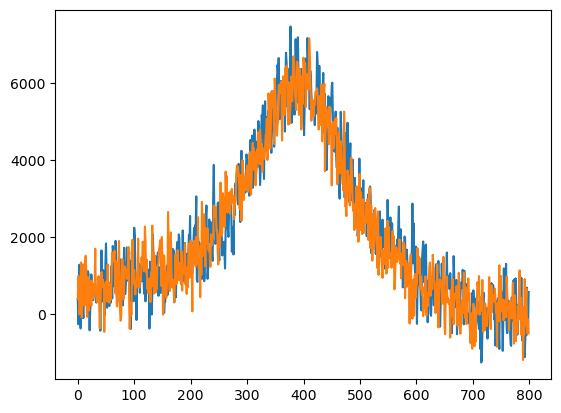

In [24]:
r = 555
ch = 10
ydata = bgsub_U[r][ch][bg_reg1[1]-bg_reg1[0]:bg_reg2[0]-bg_reg1[0]]
ydata2 = bgsub_U[r+1][ch][bg_reg1[1]-bg_reg1[0]:bg_reg2[0]-bg_reg1[0]]

plt.plot(ydata)
plt.plot(ydata2)



# automate voigt

[1.93763748e-02 4.59105831e-02 1.96791586e+00 9.91149125e+02]
[[ 8.40288517e-06 -5.85286660e-06  2.47001192e-09 -2.81780041e-02]
 [-5.85286660e-06  4.77221615e-06 -2.13532906e-09  2.62757104e-02]
 [ 2.47001192e-09 -2.13532906e-09  3.10599467e-07 -1.33255249e-05]
 [-2.81780041e-02  2.62757104e-02 -1.33255249e-05  2.10353088e+02]]
6021.163361830697
2484.4424217461383
20406.87674766065
51152.45425259609
80703.11785122388
[-109.19422675  521.17552038  340.84191474  677.52062175  954.39181353
  987.73259249 1010.2208724   -54.33931112 1108.43282225 1037.32335458]


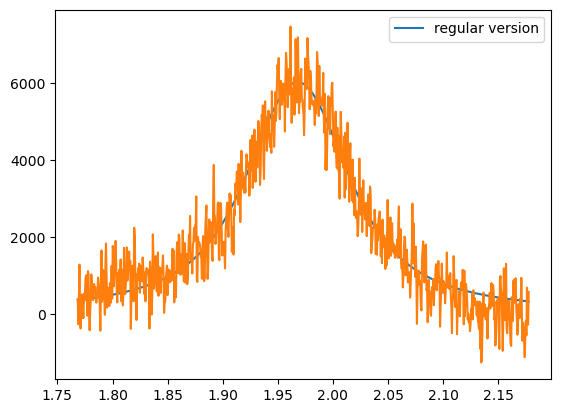

In [25]:
## look at fitting manually

r = 555
ch = 10

res_region_beg = 5450
res_region_end = 6250
res_reg = [res_region_beg,res_region_end]
xdata = xs[res_reg[0]:res_reg[1]]
ydata = bgsub_U[r][ch][bg_reg1[1]-bg_reg1[0]:bg_reg2[0]-bg_reg1[0]]
ydata_np = bgsub_U[r][ch][bg_reg1[1]-bg_reg1[0]:bg_reg2[0]-bg_reg1[0]]

def voigt2(x, sig, gam, xshift, amp):
#     xshift=1.9678
    fit = voigt_profile(x-xshift, sig, gam)*amp
    return fit

# popt, pcov = curve_fit(voigt2, xdata, ydata)
# popt, pcov = curve_fit(voigt2, xdata, ydata, bounds = ([0,0,1.5,-np.inf], [np.inf,np.inf,2.0, np.inf]))
popt, pcov = curve_fit(voigt2, xdata, ydata,p0=[0.5,0.5,2,1000], bounds = ([0,0,0,-np.inf], [np.inf,np.inf,np.inf, np.inf]))
# popt, pcov = curve_fit(voigt2, xdata, ydata,p0=[0.02,0.02,2,1000])

# popt_np, pcov_np = curve_fit(voigt2, xdata, ydata_np, bounds = ([0,0,0,-np.inf], [np.inf,np.inf,np.inf, np.inf]))

print(popt)
print(pcov)

fitted_curve = voigt2(xdata, popt[0],popt[1],popt[2],popt[3],)
# fitted_curve_np = voigt2(xdata, popt_np[0],popt_np[1],popt_np[2],popt_np[3],)

print(max(fitted_curve))
print((popt[3])*np.sqrt(2*np.pi))
print((popt[3])/(np.sqrt(2*np.pi)*popt[0]))
print((popt[3])/(popt[0]))
print(sum(fitted_curve)*(popt[0]*np.sqrt(2*np.pi)))

print(ydata[10:20])
plt.plot(xdata, fitted_curve, label = 'regular version')
# plt.plot(xdata, fitted_curve_np, label = 'np version')

# plt.plot(xs, ON_bgsub[1][0])
plt.legend()
plt.plot(xdata,ydata)

In [26]:
xs_cut = [xs] # let's just match the previous notation
xdata = xs_cut[0][res_reg[0]:res_reg[1]]*1e-6  ## just change all xs to ms and one array
# print(xs_cut[0])
print(len(xdata))
print(xdata[400])

800
1.9732479999999996e-06


In [27]:
# now voigt
start = time.time()

def voigt2(x, sig, gam, xshift, amp):
    fit = voigt_profile(x-xshift, sig, gam)*amp
    return fit

# res_region_beg = 5450
# res_region_end = 6250
res_region_beg = bg_region1_end  ##currently res region is not selectable... inside of background region
res_region_end = bg_region2_beg
res_reg = [res_region_beg,res_region_end]
if res_reg[0] < bg_reg1[1] or res_reg[1]>bg_reg2[0]:
    emessage = ('Declared Background region and Resonance region have overlapping fitting regions')
    logger.error('run '+run_num + emessage)
    raise Exception(emessage)

# xs_cut = [xs] # let's just match the previous notation
# xdata = xs_cut[0][res_reg[0]:res_reg[1]]*1e-6  ## just change all xs to ms and one array

# resonance region is assumed to be in between 2 background regions. Could maybe change this. 11.22.24
 
def voigt_fitting_noseq(bef_res_reg, aft_res_reg,xs,ys):
    ## p0 below seems to get rid of some trouble
    xdata = xs[res_reg[0]:res_reg[1]]
    ydata = ys[bg_reg1[1]-bg_reg1[0]:bg_reg2[0]-bg_reg1[0]]
    popt, pcov = curve_fit(voigt2, xdata, ydata,p0=[0.5,0.5,2,1000], bounds = ([0.0085,00.0085,0,-np.inf], [np.inf,np.inf,np.inf, np.inf]))
    fitted_curve = voigt2(xdata, popt[0],popt[1],popt[2],popt[3],)
    fit_params = popt
    fit_errs = np.diagonal(pcov)
    parameters=[fit_params,fit_errs]
#     fitted_curve_np = voigt2(xdata, popt_np[0],popt_np[1],popt_np[2],popt_np[3],)
    
#     fit_curves = []
#     parameters = []
#     ydata = ys[bef_res_reg[1]-bef_res_reg[0]:aft_res_reg[0]-bef_res_reg[0]] 
#     popt, pcov = curve_fit(voigt2, xs, ydata, bounds = ([0,0,0,-np.inf], [np.inf,np.inf,np.inf, np.inf]))
#     fitted_curve = voigt2(xs, popt[0],popt[1],popt[2],popt[3],) ## sigma, gamma, xshift (res. center), amp. related thing
#     fit_curves.append(fitted_curve)
#     fit_params = popt
#     fit_errs = np.diagonal(pcov)
#     parameters.append([fit_params,fit_errs])
    return fitted_curve, parameters ## keep same notation as before..
#     return fit_curves[0], parameters[0] ## keep same notation as before..

######################################### new
res_size = res_reg[1]-res_reg[0] 
voigt_D = np.zeros((numruns_tot_D, num_fittingchs,res_size), dtype = np.float64) ## num runs, channels, range of voigt
voigt_U = np.zeros((numruns_tot_U, num_fittingchs,res_size), dtype = np.float64) ## num runs, channels, range of voigt

v_params_D = np.zeros((numruns_tot_D, num_fittingchs,2,4), dtype = np.float64) ## channels, sequences,[params, param_errs], [sigma, gamma, shift, amp thing]
v_params_U = np.zeros((numruns_tot_U, num_fittingchs,2,4), dtype = np.float64)

# times3 = []
addtimes=0
for r in range(0, len(bgsub_D)): ## for every run
#     print(r)
    start = time.time()
    if r == 0 or r==100 or r==200 or r==300 or r==400 or r==500 or r==len(bgsub_D)-1:
        print(rf'run {r}, '+'100 runs took '+str(addtimes))
        addtimes=0
    for ch in range(0, num_fittingchs): ## and every channel (except 6Li)
        if channels_D[ch] == 'ch_24':
            emessage = ('v fit does not work for 6Li yet')
            logger.error('run '+run_num + emessage)
            raise Exception(emessage)
#         print(r, ch)
#         print(channels[ch])
#         print(len(bgsub_D[r][ch]))
#         print(len(all_D[r][ch]))
        try:
            voigt_D[r][ch], v_params_D[r][ch] = voigt_fitting_noseq(bg_reg1,bg_reg2,xs, bgsub_D[r][ch])
            voigt_U[r][ch], v_params_U[r][ch] = voigt_fitting_noseq(bg_reg1,bg_reg2,xs, bgsub_U[r][ch])
        except Exception as e:
            print('run ', r, 'chan ', ch)
            print("An error occurred:", e)
    end = time.time()
    addtimes = addtimes+(end-start)
#     times3.append(end-start)
#     print('run took '+str(end-start))

######################################### old

# res_size = res_reg[1]-res_reg[0] 
# ON_vfit = np.zeros((len(ON_bgsub),len(ON_bgsub[0]),res_size), dtype = np.float64) ## channels, sequences, range of V_ subtraction
# OFF_vfit = np.zeros((len(ON_bgsub),len(ON_bgsub[0]),res_size), dtype = np.float64) ## channels, sequences, range of V_ subtraction

# ON_vfit_params = np.zeros((len(ON_bgsub),len(ON_bgsub[0]),2,4), dtype = np.float64) ## channels, sequences,[params, param_errs], [sigma, gamma, shift, amp thing]
# OFF_vfit_params = np.zeros((len(ON_bgsub),len(ON_bgsub[0]),2,4), dtype = np.float64)

# for i in range(0, len(ON_sums)-1): 
#     if chan_enab[i] == 24:
#         emessage = ('bg_ fit does not work for 6Li yet')
#         logger.error('run '+run_num + emessage)
#         raise Exception(emessage)
#     try:
#         ON_vfit[i], ON_vfit_params[i]  = voigt_fitting(bg_reg1,bg_reg2,xdata, ON_bgsub[i])
#         OFF_vfit[i], OFF_vfit_params[i] = voigt_fitting(bg_reg1,bg_reg2,xdata, OFF_bgsub[i])
#     except Exception as e:
#         logger.error('run '+run_num + ' failed during Voigt fitting')
#         logger.exception(e)

# end = time.time()
# print('bg_ fitting time: ' + str(end-start)) 

run 0, 100 runs took 0
run 100, 100 runs took 60.23470425605774
run 200, 100 runs took 61.99086332321167
run 300, 100 runs took 61.866039752960205
run 400, 100 runs took 60.30820631980896
run 500, 100 runs took 61.24372863769531
run 647, 100 runs took 90.10244297981262


In [28]:
%matplotlib inline

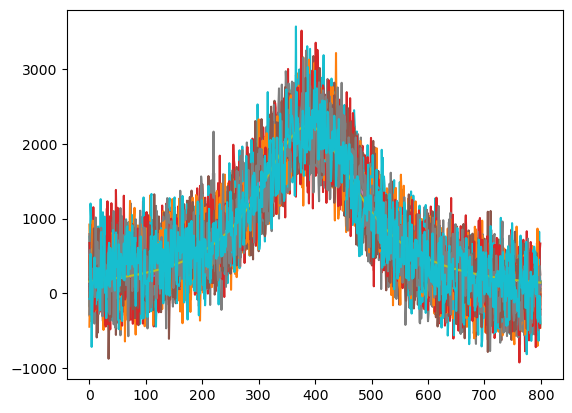

In [33]:
ch = 3
r  = 100
for r in range(0,20):
    ydata = bgsub_D[r][ch][bef_res_reg[1]-bef_res_reg[0]:aft_res_reg[0]-bef_res_reg[0]] 
    plt.plot(voigt_D[r][ch])
    plt.plot(ydata)
# plt.plot(bgsub_D[r][ch])